<a href="https://www.kaggle.com/code/thirumani/shark-tank-india-analysis?scriptVersionId=229026939" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:yellow;color:black;font-size:120%;text-align:center;border-radius:10px 10px;font-weight:bold;border:0px solid #800080;">🇮🇳 SharkTank India Exploratory Data Analysis (EDA) 🦈</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2025-Mar-22 with Python version
Python 3.10.12


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/2/2f/Shark_Tank_India.jpg', width=310, height=330)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/d/thirumani/shark-tank-india/
shark_tank = pd.read_csv('/kaggle/input/d/thirumani/shark-tank-india//Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 176
-rw-r--r-- 1 nobody nogroup 177647 Mar 22 10:30 'Shark Tank India.csv'

There are 597 rows and 80 columns in the dataset


## SharkTank US/America data analysis https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis

## 💵 Exploratory Data Analysis (EDA)

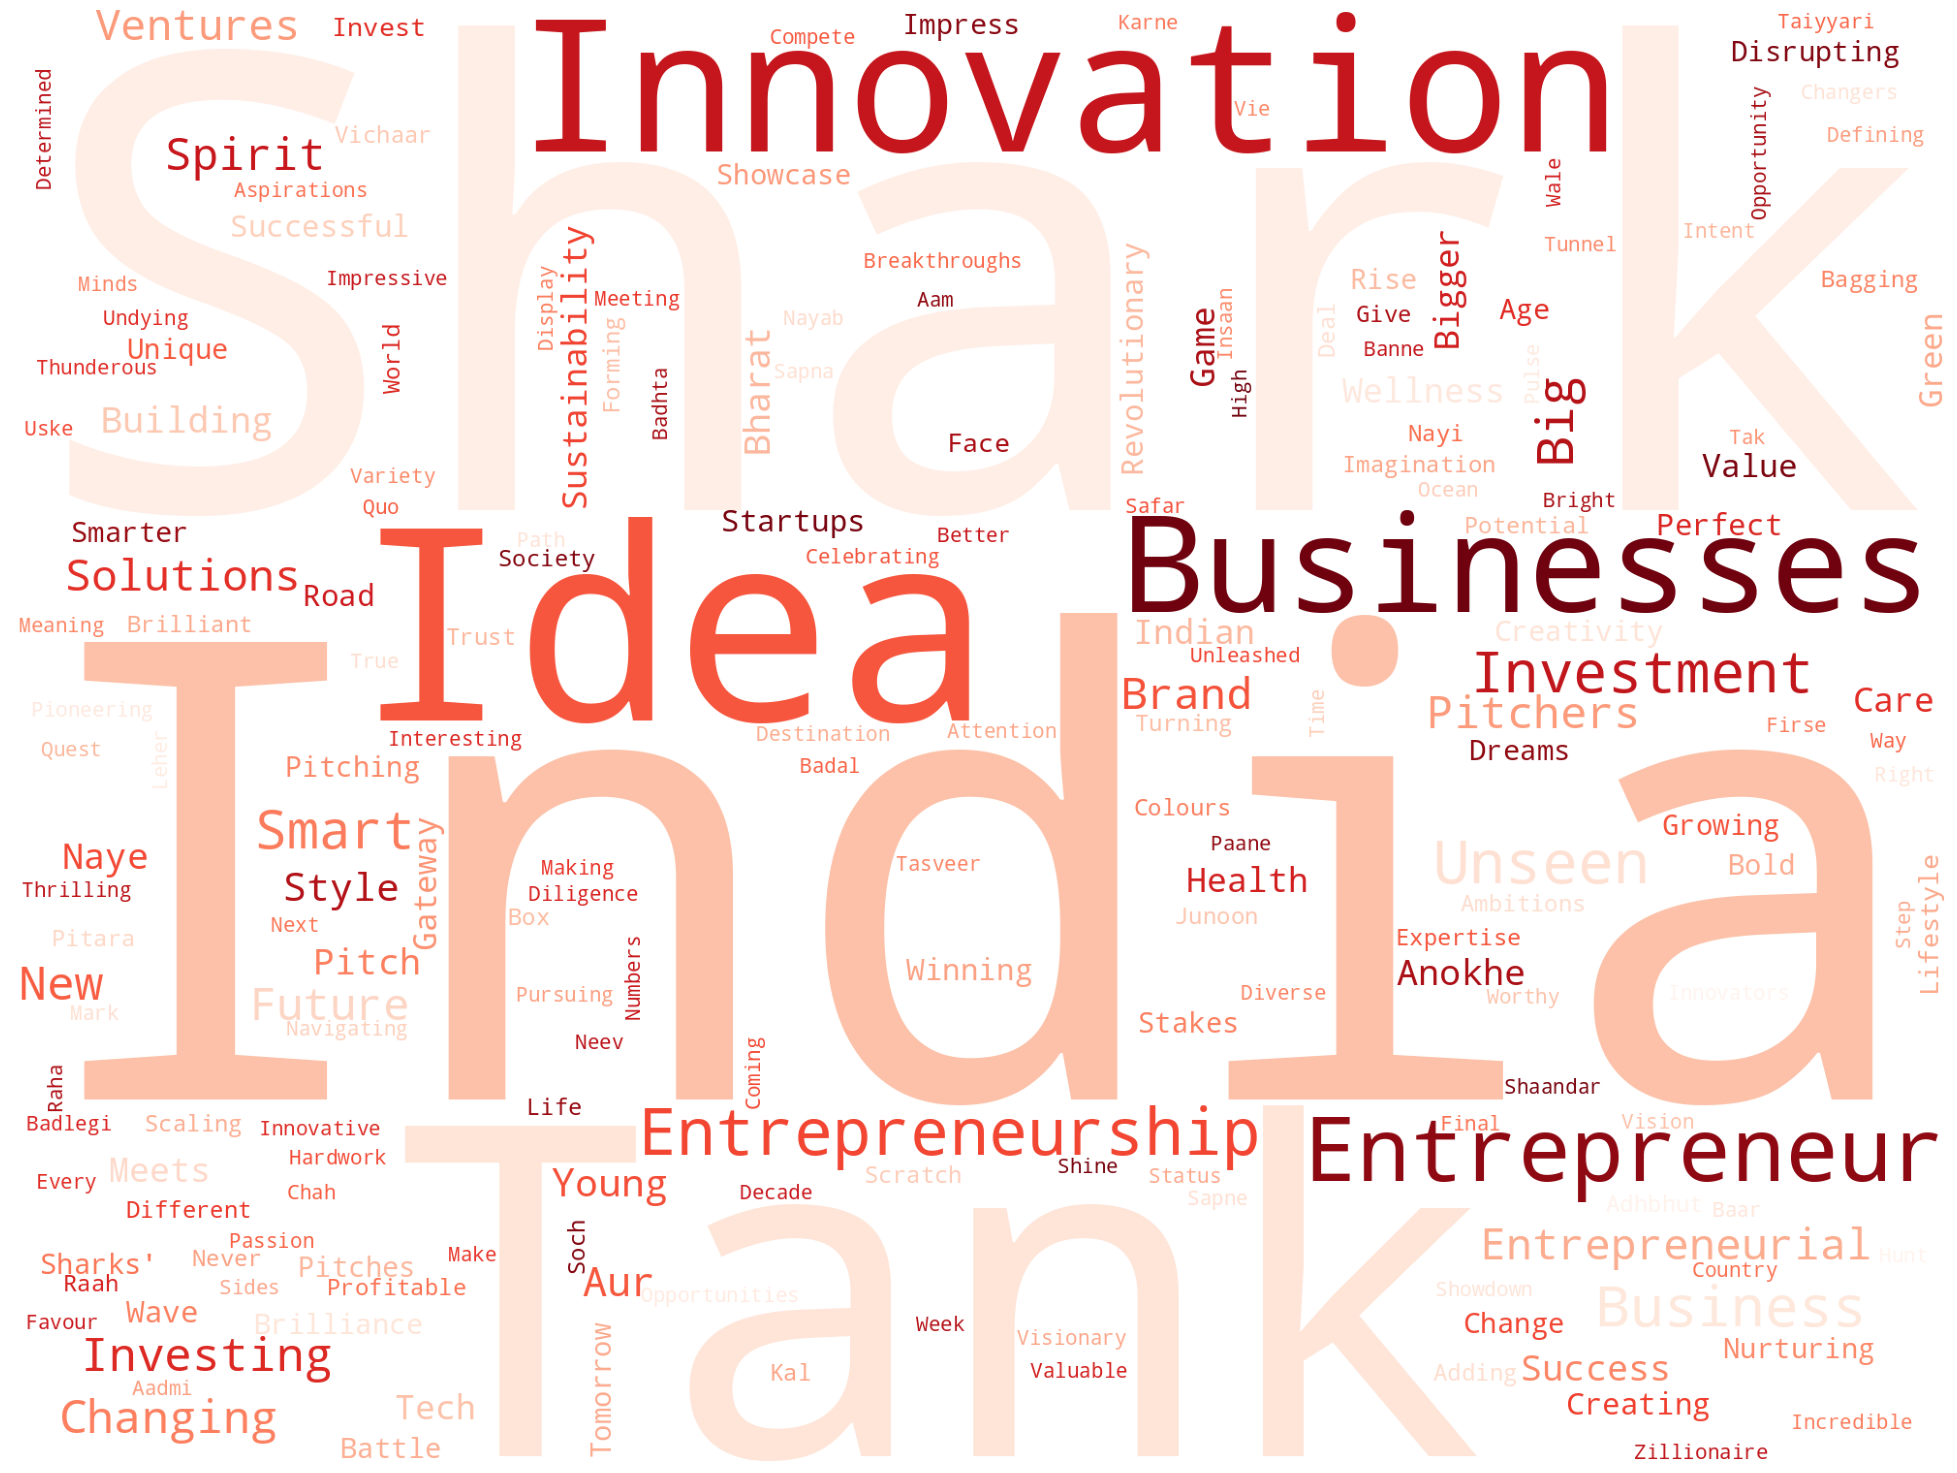

In [5]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank.loc[shark_tank['Episode Title'].notnull()]['Episode Title'])
stop_words = list(STOPWORDS) + ["Ka", "Ki", "Ke", "Ko", "Se", "Hai", "Ek"]
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='white', colormap='Reds', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [6]:
shark_tank.head(5)

Season Number      Startup Name  Episode Number  Pitch Number Season Start  \
0              1     BluePineFoods               1             1    20-Dec-21   
1              1      BoozScooters               1             2    20-Dec-21   
2              1  HeartUpMySleeves               1             3    20-Dec-21   
3              1         TagzFoods               2             4    20-Dec-21   
4              1      HeadAndHeart               2             5    20-Dec-21   

  Season End Original Air Date                Episode Title           Anchor  \
0   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
1   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
2   4-Feb-22         20-Dec-21  Badlegi Business Ki Tasveer  Rannvijay Singh   
3   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   
4   4-Feb-22         21-Dec-21      Insaan, Ideas Aur Sapne  Rannvijay Singh   

                       Industry  \
0             Food and Beverage   
1  Vehicles/Electrical Vehicles   
2                Beauty/Fashion   
3             Food and Beverage   
4            Children/Education   

                            Business Description  \
0                                   Frozen Momos   
1  Renting e-bike for mobility in private spaces   
2                             Detachable Sleeves   
3                    Healthy Potato Chips Snacks   
4                       Brain Development Course   

                 Company Website  Started in  Number of Presenters  \
0     https://bluepinefoods.com/      2016.0                     3   
1        https://www.boozup.net/      2017.0                     1   
2  https://heartupmysleeves.com/      2021.0                     1   
3         https://tagzfoods.com/      2019.0                     2   
4             https://thehnh.in/      2015.0                     4   

   Male Presenters  Female Presenters  Transgender Presenters  \
0              2.0                1.0                     NaN   
1              1.0                NaN                     NaN   
2              NaN                1.0                     NaN   
3              2.0                NaN                     NaN   
4              1.0                3.0                     NaN   

   Couple Presenters Pitchers Average Age Pitchers City Pitchers State  \
0                  0               Middle         Delhi          Delhi   
1                  0                Young     Ahmedabad        Gujarat   
2                  0                Young         Delhi          Delhi   
3                  0               Middle     Bangalore      Karnataka   
4                  1               Middle       Patiala         Punjab   

   Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  ...  \
0            95.0            8.0           NaN         NaN  ...   
1             4.0            0.4           NaN         NaN  ...   
2             NaN            2.0           NaN         NaN  ...   
3           700.0            NaN          48.0         NaN  ...   
4            30.0            NaN           NaN         NaN  ...   

   Aman Investment Amount Aman Investment Equity  Aman Debt Amount  \
0                    25.0                   5.33               NaN   
1                     NaN                    NaN               NaN   
2                     NaN                    NaN               NaN   
3                     NaN                    NaN               NaN   
4                     NaN                    NaN               NaN   

  Peyush Investment Amount Peyush Investment Equity Peyush Debt Amount  \
0                      NaN                      NaN                NaN   
1                      NaN                      NaN                NaN   
2                      NaN                      NaN                NaN   
3                      NaN                      NaN                NaN   
4                      NaN                      NaN         

In [7]:
shark_tank.tail(10).T

587       588          589       590         591  \
Season Number             4         4            4         4           4   
Startup Name    MusicPandit    Cograd  EatBetterCo  Earthful  Trajectory   
Episode Number           37        38           38        38          39   
Pitch Number            588       589          590       591         592   
Season Start       6-Jan-25  6-Jan-25     6-Jan-25  6-Jan-25    6-Jan-25   
...                     ...       ...          ...       ...         ...   
Aman Present            1.0       1.0          1.0       1.0         1.0   
Peyush Present          NaN       NaN          NaN       NaN         1.0   
Ritesh Present          1.0       1.0          1.0       1.0         1.0   
Amit Present            NaN       NaN          NaN       NaN         NaN   
Guest Present           1.0       1.0          1.0       1.0         NaN   

                                     592       593              594  \
Season Number                          4         4                4   
Startup Name    KaviThePoetry-ArtProject      F2DF  SugarStrings.ai   
Episode Number                        39        39               40   
Pitch Number                         593       594              595   
Season Start                    6-Jan-25  6-Jan-25         6-Jan-25   
...                                  ...       ...              ...   
Aman Present                         1.0       1.0              1.0   
Peyush Present                       1.0       1.0              NaN   
Ritesh Present                       1.0       1.0              1.0   
Amit Present                         NaN       NaN              NaN   
Guest Present                        NaN       NaN              2.0   

                      595       596  
Season Number           4         4  
Startup Name    Moms Home   Catwalk  
Episode Number         40        40  
Pitch Number          596       597  
Season Start     6-Jan-25  6-Jan-25  
...                   ...       ...  
Aman Present          1.0       1.0  
Peyush Present        NaN       NaN  
Ritesh Present        1.0       1.0  
Amit Present          NaN       NaN  
Guest Present         2.0       2.0  

[80 rows x 10 columns]

In [8]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Number of Presenters'] = shark_tank['Number of Presenters'].astype(pd.Int32Dtype())
shark_tank['Male Presenters'] = shark_tank['Male Presenters'].astype(pd.Int32Dtype())
shark_tank['Female Presenters'] = shark_tank['Female Presenters'].astype(pd.Int32Dtype())
shark_tank['Transgender Presenters'] = shark_tank['Transgender Presenters'].astype(pd.Int32Dtype())
shark_tank['Couple Presenters'] = shark_tank['Couple Presenters'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

# shark_tank['Gross Margin'] = shark_tank['Gross Margin'].astype(pd.Int32Dtype())
shark_tank['Net Margin'] = shark_tank['Net Margin'].astype(pd.Int32Dtype())

shark_tank['Started in'] = shark_tank['Started in'].astype(pd.Int32Dtype())
shark_tank['Yearly Revenue'] = shark_tank['Yearly Revenue'].astype(pd.Int32Dtype())

shark_tank['Received Offer'] = shark_tank['Received Offer'].astype(pd.Int32Dtype())
shark_tank['Accepted Offer'] = shark_tank['Accepted Offer'].astype(pd.Int32Dtype())

In [9]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [10]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 80 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              597 non-null    Int32  
 1   Startup Name               597 non-null    object 
 2   Episode Number             597 non-null    Int32  
 3   Pitch Number               597 non-null    Int32  
 4   Season Start               597 non-null    object 
 5   Season End                 478 non-null    object 
 6   Original Air Date          566 non-null    object 
 7   Episode Title              597 non-null    object 
 8   Anchor                     597 non-null    object 
 9   Industry                   597 non-null    object 
 10  Business Description       597 non-null    object 
 11  Company Website            582 non-null    object 
 12  Started in                 430 non-null    Int32  
 13  Number of Presenters       597 non-null    Int32  

In [11]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [12]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 4
Number of unique values in Startup Name - 597
Number of unique values in Episode Number - 53
Number of unique values in Pitch Number - 597
Number of unique values in Season Start - 4
Number of unique values in Season End - 3
Number of unique values in Original Air Date - 177
Number of unique values in Episode Title - 178
Number of unique values in Anchor - 6
Number of unique values in Industry - 17
Number of unique values in Business Description - 593
Number of unique values in Company Website - 582
Number of unique values in Started in - 18
Number of unique values in Number of Presenters - 6
Number of unique values in Male Presenters - 7
Number of unique values in Female Presenters - 4
Number of unique values in Transgender Presenters - 1
Number of unique values in Couple Presenters - 2
Number of unique values in Pitchers Average Age - 3
Number of unique values in Pitchers City - 136
Number of unique values in Pitchers State - 55
Number of 

## 🏦 All seasons of SHARK TANK INDIA was broadcasted in SonyLiv OTT and Sony TV

In [13]:
shark_tank_season1 = shark_tank.loc[shark_tank['Season Number']==1]
shark_tank_season1_without_unseen = shark_tank.loc[(shark_tank['Season Number']==1) & (shark_tank['Episode Number']!=0)]
shark_tank_season2 = shark_tank.loc[shark_tank['Season Number']==2]
shark_tank_season3 = shark_tank.loc[(shark_tank['Season Number']==3) | (shark_tank['Season Number'].isnull())]
shark_tank_season4 = shark_tank.loc[shark_tank['Season Number']==4]

In [14]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in Indian SharkTank \n")
print(shark_tank['Pitch Number'].max(), "#startups came for pitching \n")
print("In Season 1, in", shark_tank_season1['Episode Number'].max(), "episodes, there were", shark_tank_season1.loc[shark_tank_season1['Episode Number']!=0]['Startup Name'].count(), "(real) pitches and", shark_tank_season1.loc[shark_tank_season1['Episode Number']==0]['Startup Name'].count(),"unseen pitches\n")
print("In Season 2, in", shark_tank_season2['Episode Number'].max(), "episodes, there were", shark_tank_season2.loc[shark_tank_season2['Episode Number']!=0]['Startup Name'].count(), "(real) pitches and", shark_tank_season2.loc[shark_tank_season2['Episode Number']==0]['Startup Name'].count(),"unseen pitch\n")
print("In Season 3, in", shark_tank_season3['Episode Number'].max(), "episodes, there were", shark_tank_season3.loc[shark_tank_season3['Episode Number']!=0]['Startup Name'].count(), "(real) pitches\n")
print("In Season 4, in", shark_tank_season4['Episode Number'].max(), "episodes, there were", shark_tank_season4.loc[shark_tank_season4['Episode Number']!=0]['Startup Name'].count(), "(real) pitches\n")

4 total seasons in Indian SharkTank 

597 #startups came for pitching 

In Season 1, in 36 episodes, there were 122 (real) pitches and 30 unseen pitches

In Season 2, in 51 episodes, there were 168 (real) pitches and 1 unseen pitch

In Season 3, in 52 episodes, there were 157 (real) pitches

In Season 4, in 40 episodes, there were 119 (real) pitches



Season Number    1   2   3   4
Episode Number  36  51  52  40


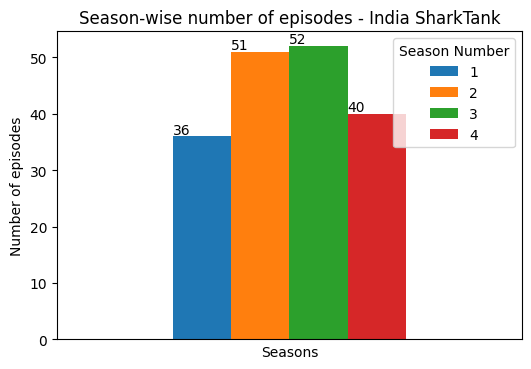

In [15]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Season-wise number of episodes - India SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [16]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> SharkTank India - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=520, height=400)
fig.update_yaxes(tickvals=list(range(6)))
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [17]:
# There were 2 to 4 pitches, in each episode
print(shark_tank.loc[shark_tank['Episode Number']!=0][['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[2 3 4]


In [18]:
# Types of industries, came for investment, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank India - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=820, height=650)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [19]:
# Types of industries, came for investment, in current/latest season (4th season)
tmp = shark_tank_season4['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Indian Shark Tank in 4th season - Industry wise startups</b>", template='simple_white', text=tmp, width=630, height=600)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [20]:
# All seasons averages
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in INR in lakhs and equity in %

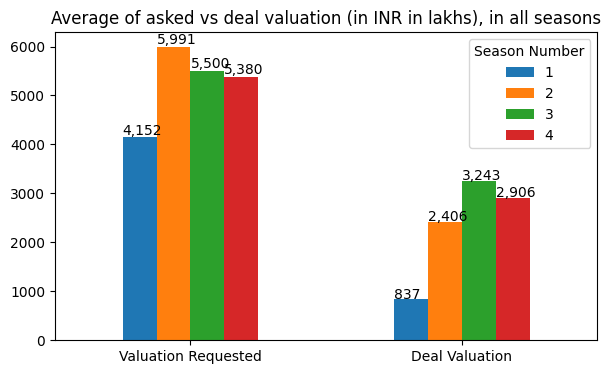

In [21]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(7,4), title="Average of asked vs deal valuation (in INR in lakhs), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

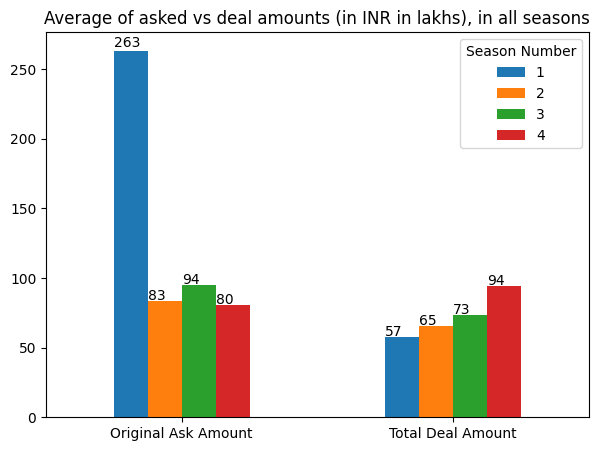

In [22]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(7,5), title="Average of asked vs deal amounts (in INR in lakhs), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

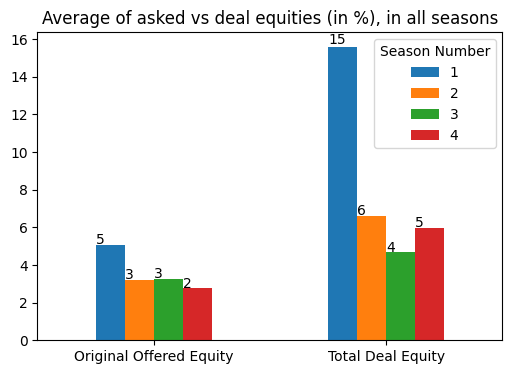

In [23]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(shark_tank, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(6,4), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [24]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")
print("")
print("Total male pitchers -", int(shark_tank['Male Presenters'].sum()), "\n")
print("Total female pitchers -", int(shark_tank['Female Presenters'].sum()), "\n")
print("Total transgender pitchers -", int(shark_tank['Transgender Presenters'].sum()), "\n")
print("")
print("COVID entrepreneurs/startups - ", shark_tank.loc[shark_tank['Started in']==2020]['Startup Name'].count(), sep='')

Total pitchers - 1198 


Total male pitchers - 863 

Total female pitchers - 332 

Total transgender pitchers - 3 


COVID entrepreneurs/startups - 67


Male entrepreneurs percentage - 72.04%

Female entrepreneurs percentage - 27.71%

Transgender entrepreneurs percentage - 0.25%

Couple entrepreneurs percentage - 8.0%




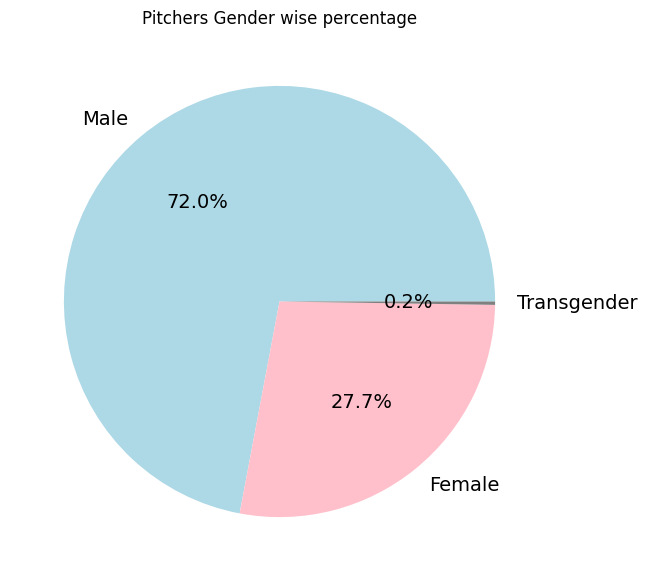

In [25]:
print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Transgender entrepreneurs percentage - ", round(shark_tank['Transgender Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Couple entrepreneurs percentage - ", round(shark_tank.loc[shark_tank['Couple Presenters']==1]['Couple Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 0), "%\n", sep='')
print("")

fig = plt.figure(figsize =(10, 7))
plt.title("Pitchers Gender wise percentage")
plt.pie([round(shark_tank['Male Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), round(shark_tank['Female Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), round(shark_tank['Transgender Presenters'].sum()/shark_tank['Number of Presenters'].sum()*100, 2)], labels = ["Male","Female","Transgender"], autopct='%.1f%%', colors=["lightblue", "pink", "gray"], textprops={'fontsize': 14})
plt.show()

Pitchers Average Age
Middle    448
Young     144
Old         5
Name: count, dtype: int64 

Pitchers Average Age
Middle    75%
Young     24%
Old        1%
Name: proportion, dtype: object 



Text(0, 0.5, '')

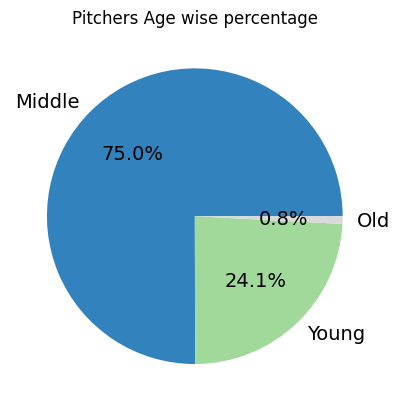

In [26]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.1f%%', cmap='tab20c', fontsize=14)
plt.ylabel('')

### 💹 68% companies received offers and 32% startups could not convince Sharks to invest

Received Offer
1    407
0    190
Name: count, dtype: Int64 

Received Offer
1    68%
0    32%
Name: proportion, dtype: object


Text(0, 0.5, '')

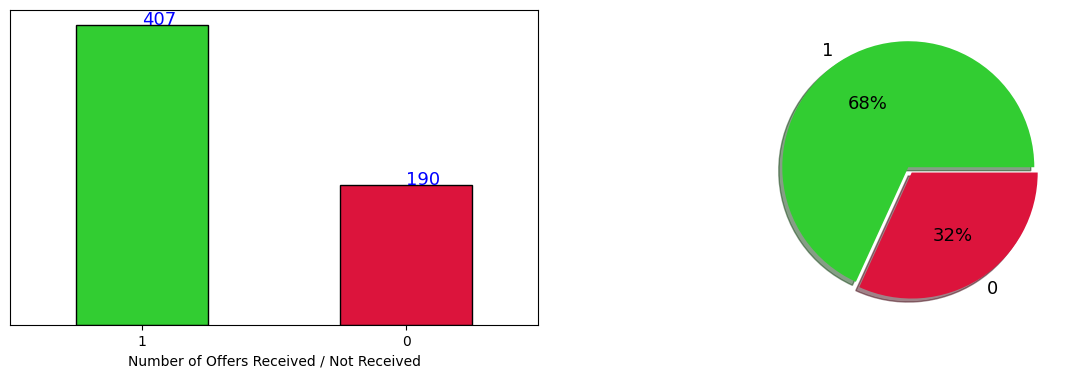

In [27]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Received Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received")
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Received Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")

ax2 = plt.subplot(222)
shark_tank["Received Offer"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 407 companies received offers & 190 startups could not convince #Sharks to invest.

### ＄ 84% companies accepted offers and 16% startups didn't accept Sharks offer

Accepted Offer
1    345
0     62
Name: count, dtype: Int64 

Accepted Offer
1    85%
0    15%
Name: proportion, dtype: object


Text(0, 0.5, '')

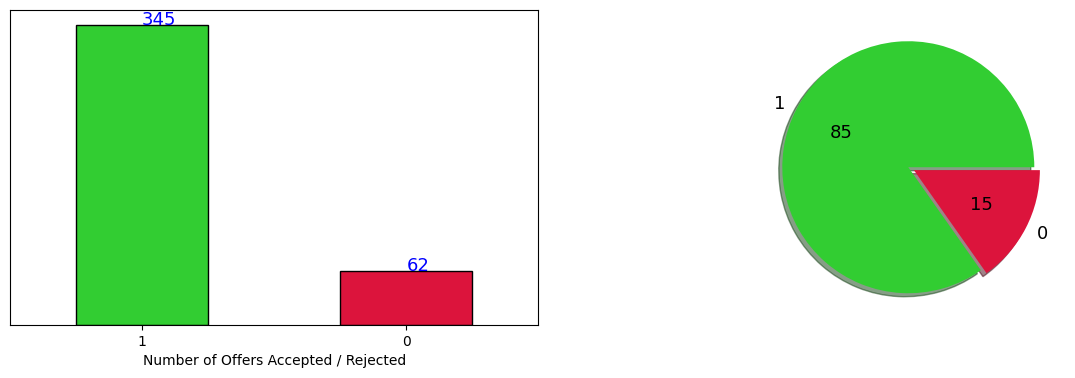

In [28]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15, 9))
ax1 = plt.subplot(221)
shark_tank["Accepted Offer"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Accepted / Rejected")
plt.yticks([])
plt.xticks(rotation = 0)
for x,y in enumerate(shark_tank["Accepted Offer"].value_counts()):
    plt.annotate(y, (x,y), fontsize=13, color="blue")

ax2 = plt.subplot(222)
shark_tank["Accepted Offer"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=13)
plt.ylabel('')

# 345 companies accepted investments they got & 62 #Startups did not accept Shark's offer.

In [29]:
# Offers rejected by pitchers/startup companies
print(shark_tank[shark_tank['Accepted Offer']==0]["Startup Name"].count())
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Season Number","Startup Name","Industry","Original Ask Amount","Original Offered Equity"]]

62


Season Number      Startup Name                 Industry  \
6                1        qZenseLabs        Food and Beverage   
19               1          Torch-it       Children/Education   
21               1       LaKheerDeli        Food and Beverage   
27               1     KabiraHandmad        Food and Beverage   
41               1  MorrikoPureFoods        Food and Beverage   
..             ...               ...                      ...   
540              4       Schickwheel            Manufacturing   
545              4    Alt.fCoworking        Business Services   
550              4  SkateSupplyIndia  Fitness/Sports/Outdoors   
552              4             GOFIG                   Others   
571              4         PieMatrix                   Others   

     Original Ask Amount  Original Offered Equity  
6                  100.0                     0.25  
19                  75.0                     1.00  
21                  50.0                     7.50  
27                 100.0                     5.00  
41                 100.0                     3.00  
..                   ...                      ...  
540                 70.0                     1.00  
545                100.0                     0.75  
550                 50.0                     2.00  
552                 50.0                     2.00  
571                100.0                     3.00  

[62 rows x 5 columns]

## ❗ Shark Tank India data set Visualizations/infographics in Tableau Public —
### https://public.tableau.com/app/profile/satya.thirumani/viz/SharkTankIndia_16448181343920/SharkTankIndiaStory

In [30]:
IFrame('https://public.tableau.com/views/SharkTankIndia_16448181343920/SharkTankIndiaStory', width=1100, height=1000)

In [31]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher - Rs.", round(shark_tank["Original Ask Amount"].max()/100), "crores")

Maximum amount requested, by a pitcher - Rs. 300 crores


In [32]:
# Least amount requested
print("Least amount requested, by a pitcher - Rs.", round(shark_tank["Original Ask Amount"].min()*100000))

Least amount requested, by a pitcher - Rs. 0


In [33]:
# Sum of investment amount asked, in Shark Tank India
print("Sum of investment amount asked, by all startup companies, in Indian Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Sum of investment amount asked, by all startup companies, in Indian Shark Tank - ₹786.03 crores


In [34]:
# Amount invested by all sharks, in India SharkTank
print("Amount invested by all sharks, in Shark Tank India -", format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Amount invested by all sharks, in Shark Tank India - ₹249.84 crores


In [35]:
# Sum of loan/debt amount, in Indian Shark Tank
print("Sum of loan/debt amount, given by all sharks, in India SharkTank -", format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

Sum of loan/debt amount, given by all sharks, in India SharkTank - ₹33.56 crores


In [36]:
# Number of investments with more than 1cr amount
print(shark_tank[shark_tank['Total Deal Amount']>=100]["Startup Name"].count())

97


In [37]:
# Top 20 investments, as per total investment/deal amount (in crores)
tmpdf = shark_tank.sort_values('Total Deal Amount', ascending=False)[0:20]
tmpdf['Total Deal Amount'] = tmpdf['Total Deal Amount']/100
print(tmpdf.groupby('Startup Name')['Total Deal Amount'].max().nlargest(20))

fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount', color="Startup Name", title="Highest Investment as per deal amount (in crores)", text=tmpdf['Total Deal Amount'])
fig.show(renderer="iframe")

Startup Name
NOOE                         5.00
TheNaturikCo                 4.00
CultureCircle                3.00
NasherMiles                  3.00
WeHear                       2.50
KIWIKisanWindow              2.50
UnStop                       2.00
SpeedKitchen                 2.00
Refit                        2.00
Pharmallama                  2.00
BurgerBae                    2.00
Canvaloop                    2.00
MeduLance                    2.00
JewelBox                     2.00
HealthFab                    2.00
GoenchiFeni                  2.00
DilFoods                     2.00
RahejaSolarFoodProcessing    1.75
Metashot                     1.60
Intervue                     1.50
Name: Total Deal Amount, dtype: float64


In [38]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest Investment as per Equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name
Sid07Designs          75.00
NOOE                  51.00
BoozScooters          50.00
IsakFragrances        50.00
HammerLifestyle       40.00
KGAgrotech            40.00
TheSassBar            35.00
VivalyfInnovations    33.33
GoldSafeSolutions     30.00
HeartUpMySleeves      30.00
JainShikanji          30.00
ColourMeMad-CMM       25.00
CosIQ                 25.00
FindYourKicksIndia    25.00
HoloKitab             25.00
PNTRobotics           25.00
PolishMePretty        25.00
Raasa                 25.00
LOKA                  24.00
TheQuirkyNaari        24.00
Name: Total Deal Equity, dtype: float64


In [39]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Season Number","Startup Name","Total Deal Amount", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    8
dtype: int64
     Season Number        Startup Name  Total Deal Amount  Total Deal Equity
1                1        BoozScooters               40.0              50.00
23               1  VivalyfInnovations               56.0              33.33
43               1     HammerLifestyle              100.0              40.00
66               1        Sid07Designs               25.0              75.00
76               1          TheSassBar               50.0              35.00
77               1          KGAgrotech               10.0              40.00
82               1      IsakFragrances               50.0              50.00
484              4                NOOE              500.0              51.00


In [40]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Total Deal Debt'].count(),"\n")
shark_tank.loc[shark_tank['Total Deal Debt'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Total Deal Debt"]]

Number of startups who got debt/loan amount 70 



Season Number     Startup Name  Total Deal Amount  Total Deal Equity  \
8                1             NOCD               20.0               15.0   
44               1      PNTRobotics               25.0               25.0   
46               1      BambooIndia               50.0                3.5   
56               1             Otua                1.0                1.0   
62               1    TheStatePlate               40.0                3.0   
..             ...              ...                ...                ...   
525              4  RBDMachineTools               50.0                1.0   
561              4          Chokhat               30.0               10.0   
588              4           Cograd               50.0                6.0   
591              4       Trajectory               50.0                3.0   
593              4             F2DF                5.0                2.0   

     Total Deal Debt  
8               30.0  
44              25.0  
46              30.0  
56              99.0  
62              25.0  
..               ...  
525             50.0  
561             20.0  
588             50.0  
591             50.0  
593             45.0  

[70 rows x 5 columns]

In [41]:
# Top 20 investments, as per total debt/loan amount, in crores
tmpdf = shark_tank.sort_values('Total Deal Debt', ascending=False)[0:20]
tmpdf['Total Deal Debt'] = tmpdf['Total Deal Debt']/100
print(tmpdf.groupby('Startup Name')['Total Deal Debt'].max().nlargest(20))

fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Debt', color="Startup Name", title="Highest Investment as per Debt amount (in crores)", text=tmpdf['Total Deal Debt'])
fig.show(renderer="iframe")

Startup Name
SavaniHeritage       2.00
Stage                1.50
Deeva                1.25
WatchoutWearables    1.00
uBreathe             1.00
Otua                 0.99
Nemocare             0.80
Vecros               0.80
Katidhan             0.75
Wol3D                0.70
TAC                  0.69
maisha               0.65
Hood                 0.60
iMumz                0.60
LilGoodness          0.50
Rubans               0.50
FlexifyMe            0.50
GROWiT               0.50
iDreamCareer         0.50
Smotect              0.50
Name: Total Deal Debt, dtype: float64


In [42]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Percentage'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Percentage'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Royalty Percentage","Royalty Recouped Amount"]]

Number of startups who gave Royalty 33 



Season Number           Startup Name  Total Deal Amount  \
321              3             HonestHome              100.0   
322              3              AdilQadri              100.0   
342              3                 Tiggle               50.0   
351              3                 GudGum               80.0   
362              3              DecodeAge              100.0   
365              3            NasherMiles              300.0   
369              3                   VOLD               10.0   
375              3               YesMadam              150.0   
378              3             PushSports               80.0   
385              3                  Refit              200.0   
387              3                Artinci               50.0   
397              3                 Cosmix              100.0   
401              3    UnclePetersPanCakes               60.0   
410              3          KryzenBiotech               75.0   
433              3          AToddlerThing               40.0   
454              3                Popcorn               75.0   
468              3             NeonAttack               50.0   
472              3                    Lea              100.0   
479              4                CONFECT              100.0   
507              4               Aquapeya               70.0   
510              4                  Shyle               70.0   
519              4                  Rosha               60.0   
522              4               tikitoro               25.0   
527              4     GoodlandPickleball               80.0   
530              4           GabruDiChaap              140.0   
535              4             WomanLikeU              100.0   
554              4               bambinos              100.0   
558              4            PaleooBakes              100.0   
564              4        BetterNutrition               60.0   
577              4               Palmonas              126.0   
579              4  Nidhi'sGrandmaaSecret               70.0   
589              4            EatBetterCo               50.0   
595              4              Moms Home               75.0   

     Total Deal Equity  Royalty Percentage  Royalty Recouped Amount  
321               3.00                 1.0                   150.00  
322               1.00                 1.0                   100.00  
342              20.00                 2.0                   100.00  
351              10.00                 4.0                    80.00  
362               2.25                 1.0                   150.00  
365               1.50                 1.0                   300.00  
369              10.00                 3.0                    40.00  
375               2.00                 2.0                   150.00  
378               4.00                 2.0                   160.00  
385               1.00                 1.0                   300.00  
387               5.00                 1.0                    75.00  
397               1.00                 1.0                   100.00  
401               3.00                 3.0                   120.00  
410              15.00                 2.0                   150.00  
433               2.00                 3.0                    40.00  
454              15.00                 3.0                    75.00  
468               2.00                 2.0                    50.00  
472               4.00                 2.0                   150.00  
479               2.00                 2.0                   100.00  
507               3.00                 1.0                    70.00  
510               1.50                 0.5                    70.00  
519               4.00                 1.5                    90.00  
522               1.00                 0.5                    25.00  
527               6.00                 0.5                    80.00  
530               6.00                 1.0                   140.00  
535     

Season Number       1  2   3   4
Royalty Percentage  0  0  18  15


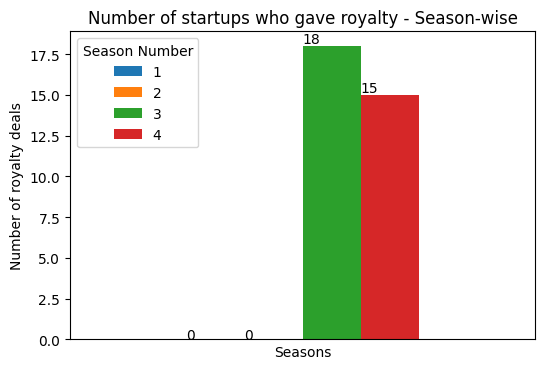

In [43]:
# Season-wise number of royalty deals
tmp = pd.pivot_table(shark_tank, values='Royalty Percentage', columns='Season Number', aggfunc='count')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Number of startups who gave royalty - Season-wise")
plt.xlabel("Seasons")
plt.ylabel("Number of royalty deals")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [44]:
# Startups who gave Advisory shares
print("Number of startups who gave advisory shares/equity", shark_tank['Advisory Shares Equity'].count(),"\n")

shark_tank.loc[shark_tank['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave advisory shares/equity 7 



Season Number               Startup Name  Total Deal Amount  \
334              3          AIKavach/Panoplia              100.0   
341              3                     WeHear              250.0   
349              3                      Arata              100.0   
516              4                      Seven               75.0   
532              4                  SonicLamb               50.0   
533              4                     Woolah               50.0   
542              4  RahejaSolarFoodProcessing              175.0   

     Total Deal Equity  Advisory Shares Equity  
334               2.50                    2.50  
341               1.00                    1.50  
349               1.33                    0.60  
516               1.50                    1.50  
532               1.00                    1.00  
533               2.50                    2.50  
542               4.38                    2.63

Season Number           1  2  3  4
Advisory Shares Equity  0  0  3  4


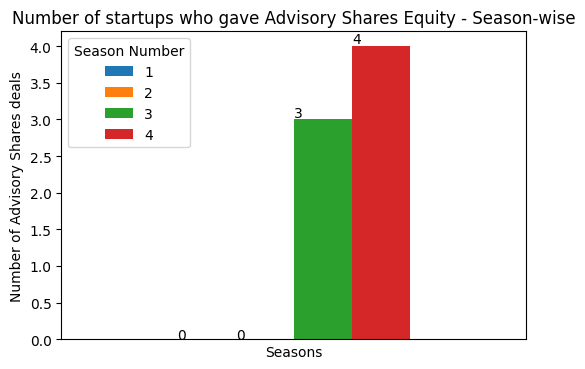

In [45]:
# Season-wise number of companies given Advisory Shares Equity
tmp = pd.pivot_table(shark_tank, values='Advisory Shares Equity', columns='Season Number', aggfunc='count')
print(tmp)
ax = tmp.plot.bar(figsize=(6,4), title="Number of startups who gave Advisory Shares Equity - Season-wise")
plt.xlabel("Seasons")
plt.ylabel("Number of Advisory Shares deals")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [46]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 35 



Season Number            Startup Name  Total Deal Amount  \
8                1                    NOCD               20.0   
29               1                Meatyour               30.0   
32               1  ARRCOATSurfaceTextures               50.0   
44               1             PNTRobotics               25.0   
79               1               PawsIndia               50.0   
82               1          IsakFragrances               50.0   
105              1              GrowFitter               50.0   
224              2                   Amore               75.0   
238              2               CloudWorx               40.0   
242              2               Daryaganj               90.0   
243              2             DhruvVidyut                0.0   
254              2                Freakins               50.0   
264              2               HoloKitab               45.0   
266              2                Hornback               50.0   
298              2             SinghStyled               50.0   
334              3       AIKavach/Panoplia              100.0   
341              3                  WeHear              250.0   
349              3                   Arata              100.0   
358              3                DaakRoom               36.0   
379              3                    ORBO              100.0   
387              3                 Artinci               50.0   
393              3             AristaVault               20.0   
403              3               CandidMen               60.0   
416              3                  MEPACK                7.0   
436              3            iDreamCareer               60.0   
440              3                 Smotect               50.0   
479              4                 CONFECT              100.0   
481              4                BLFabric              100.0   
484              4                    NOOE              500.0   
522              4                tikitoro               25.0   
523              4                   Ashva               50.0   
527              4      GoodlandPickleball               80.0   
549              4               RepeatGud               50.0   
553              4                Joyspoon               40.0   
585              4                  Medial               50.0   

     Total Deal Equity  
8                15.00  
29               20.00  
32               15.00  
44               25.00  
79               15.00  
82               50.00  
105               2.00  
224               7.50  
238               3.20  
242               1.00  
243               0.50  
254               2.50  
264              25.00  
266               2.50  
298              10.00  
334               2.50  
341               1.00  
349               1.33  
358               6.00  
379               1.00  
387               5.00  
393               1.00  
403               5.00  
416              10.00  
436               1.00  
440               5.00  
479               2.00  
481               5.00  
484              51.00  
522               1.00  
523               4.00  
527               6.00  
549              10.00  
553               2.00  
585               2.50

In [47]:
# Gender-wise pitchers combination
shark_tank.groupby([shark_tank['Male Presenters'].fillna(0),shark_tank['Female Presenters'].fillna(0)]).size().nlargest(10)

# 2 males is most frequent combination followed by 1 male and 1 female

Male Presenters  Female Presenters
2                0                    141
1                1                    135
                 0                    109
3                0                     56
0                1                     49
2                1                     36
0                2                     33
1                2                     14
4                0                     11
3                1                      6
dtype: int64

In [48]:
# Gender/age wise pitchers combination
shark_tank.groupby([shark_tank['Male Presenters'],shark_tank['Pitchers Average Age']]).size().nlargest(10)

# Single male or two males in middle age is most frequent combination

Male Presenters  Pitchers Average Age
1                Middle                  198
2                Middle                  134
1                Young                    60
3                Middle                   54
2                Young                    43
0                Middle                   11
3                Young                     9
4                Middle                    6
0                Young                     5
4                Young                     5
dtype: int64

In [49]:
# Gender/age wise pitchers combination
shark_tank.groupby([shark_tank['Female Presenters'],shark_tank['Pitchers Average Age']]).size().nlargest(10)

# Single female in middle age is frequent combination

Female Presenters  Pitchers Average Age
1                  Middle                  175
0                  Middle                   51
1                  Young                    51
2                  Middle                   37
0                  Young                    14
2                  Young                    11
0                  Old                       2
2                  Old                       2
3                  Middle                    2
dtype: int64

## 💰 Which shark invested most ?

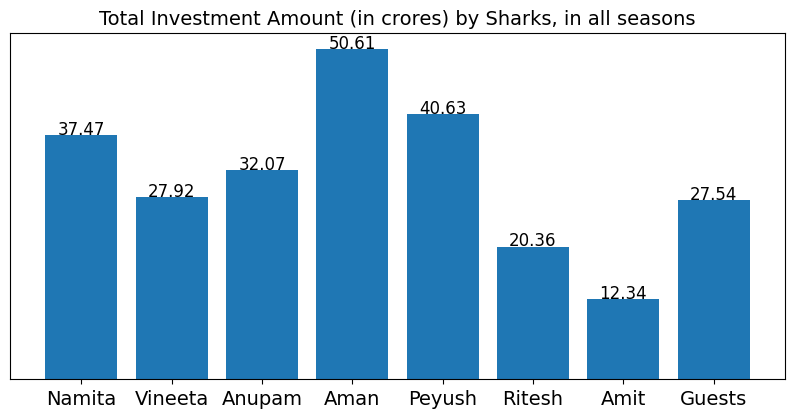

In [50]:
# Amount Invested by sharks, in all seasons
Amount = [shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ritesh Investment Amount'].sum()/100, shark_tank['Amit Investment Amount'].sum()/100, shark_tank['Guest Investment Amount'].sum()/100]
name=['Namita','Vineeta','Anupam','Aman','Peyush','Ritesh','Amit','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4.5))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+0.1, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total Investment Amount (in crores) by Sharks, in all seasons", fontsize=14)
plt.show()

# Aman invested maximum amount, in all seasons - 50 crores
# Amit invested minimum amount, in all seasons - 12 crores

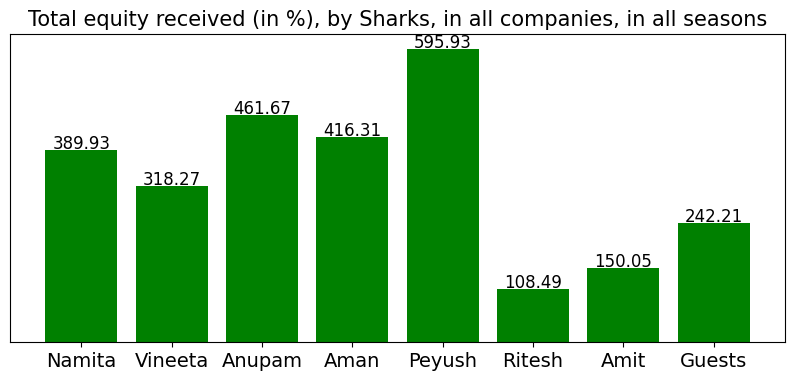

In [51]:
# Equity received by sharks, in all seasons
Amount = [shark_tank['Namita Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), 
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ritesh Investment Equity'].sum(), shark_tank['Amit Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
df = {'Name':name, 'Total Equity':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

# Peyush got maximum equity of - 595% in different companies, in all seasons
# Ritesh got minimum equity of - 108% in different companies, in all seasons

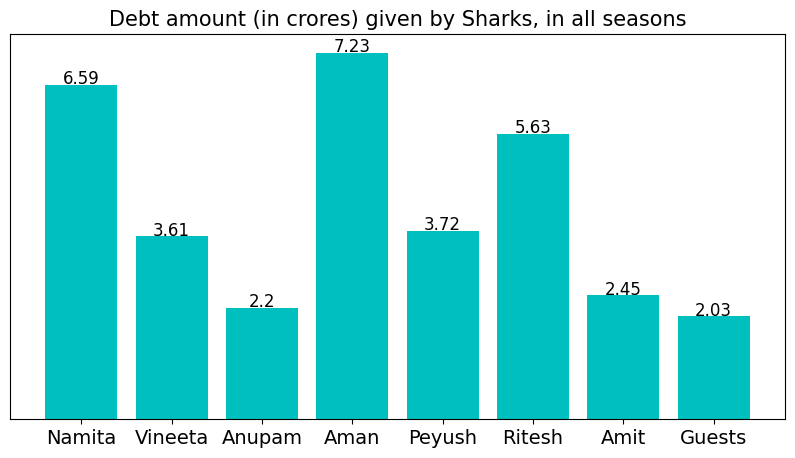

In [52]:
# Investment based on the Debt/loaned Amount, in all seasons
Amount = [shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100,shark_tank['Ritesh Debt Amount'].sum()/100, shark_tank['Amit Debt Amount'].sum()/100,  shark_tank['Guest Debt Amount'].sum()/100]
df = {'Name':name, 'Total Equity':Amount}
plt.figure(figsize=(10,5))
plt.bar(df['Name'], df['Total Equity'], color='c')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d+0.01, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Debt amount (in crores) given by Sharks, in all seasons", fontsize=15)
plt.show()

# Aman gave maximum debt amount, in all seasons - 7.23cr
# All Guests gave minimum debt amount, in all seasons - 2cr

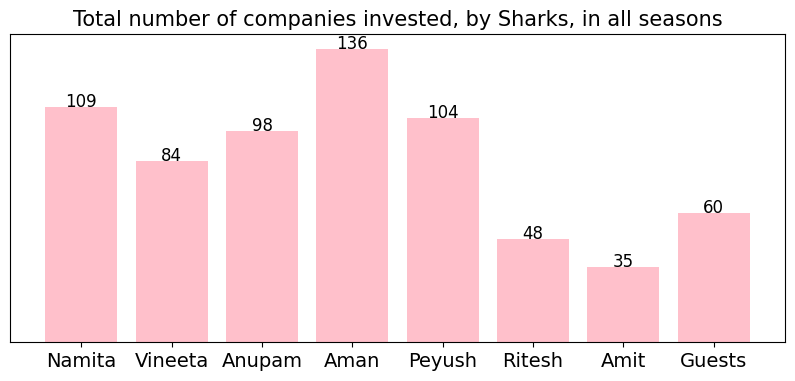

In [53]:
## Number of companies invested, in all seasons
Amount = [shark_tank['Namita Investment Amount'].count(), shark_tank['Vineeta Investment Amount'].count(), shark_tank['Anupam Investment Amount'].count(), 
    shark_tank['Aman Investment Amount'].count(), shark_tank['Peyush Investment Amount'].count(), shark_tank['Ritesh Investment Amount'].count(), shark_tank['Amit Investment Amount'].count(), shark_tank['Guest Investment Amount'].count()]
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=14)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y =d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
plt.show()

# Aman invested in most number of companies - 136 (among regular sharks)
# Amit invested in least number of companies - 35 (among regular sharks)

## 📊 BIGG BOSS Dataset https://www.kaggle.com/datasets/thirumani/bigg-boss-india-hindi-telugu-tamil-kannada

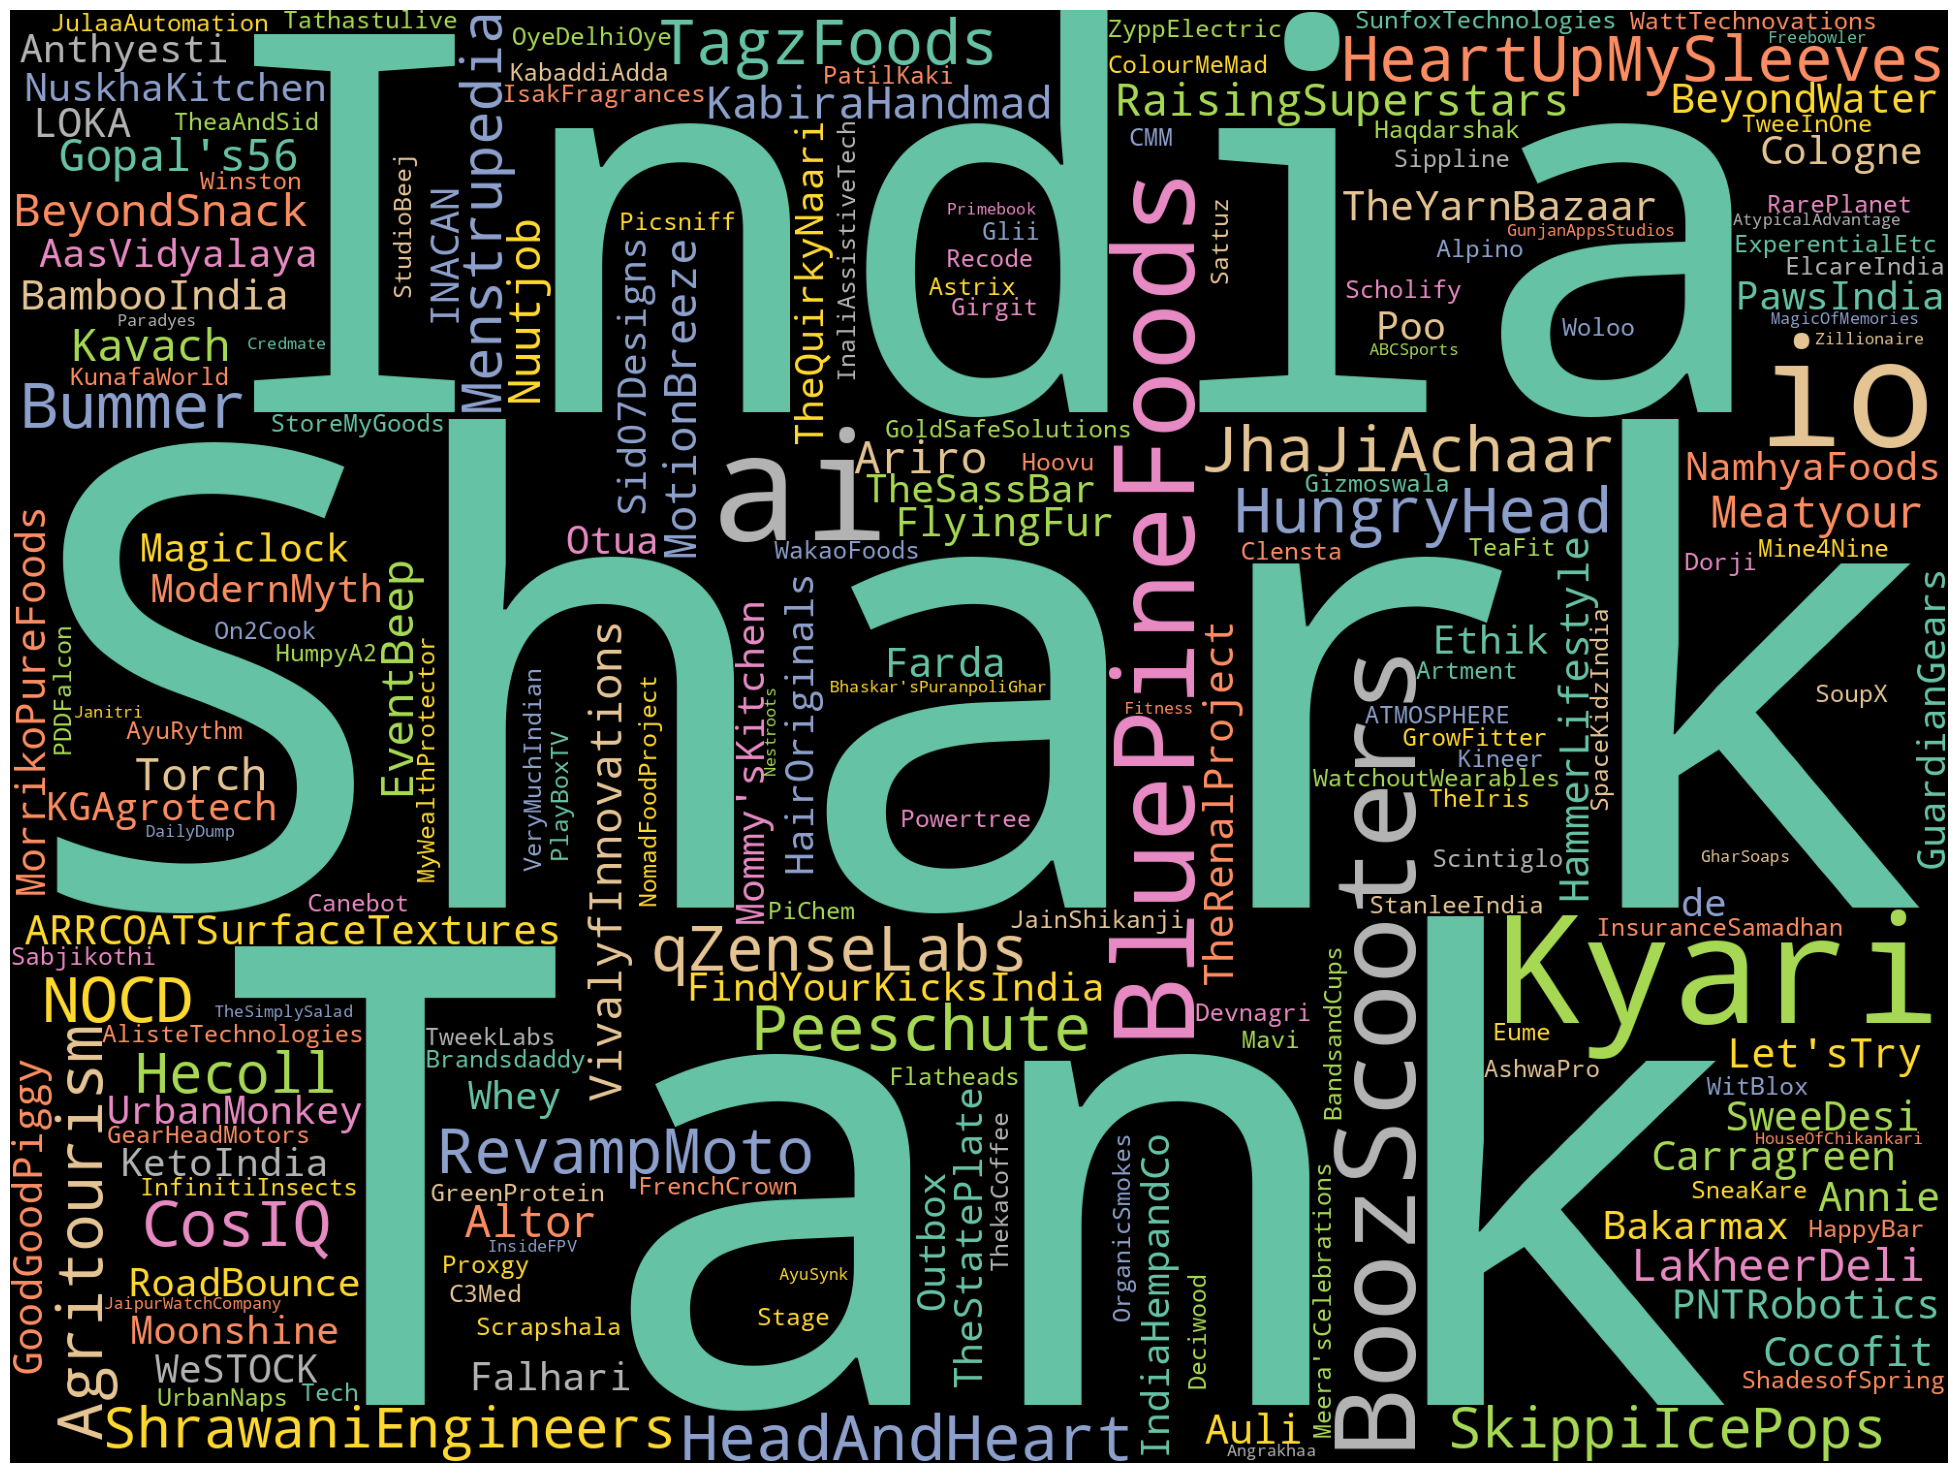

In [54]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

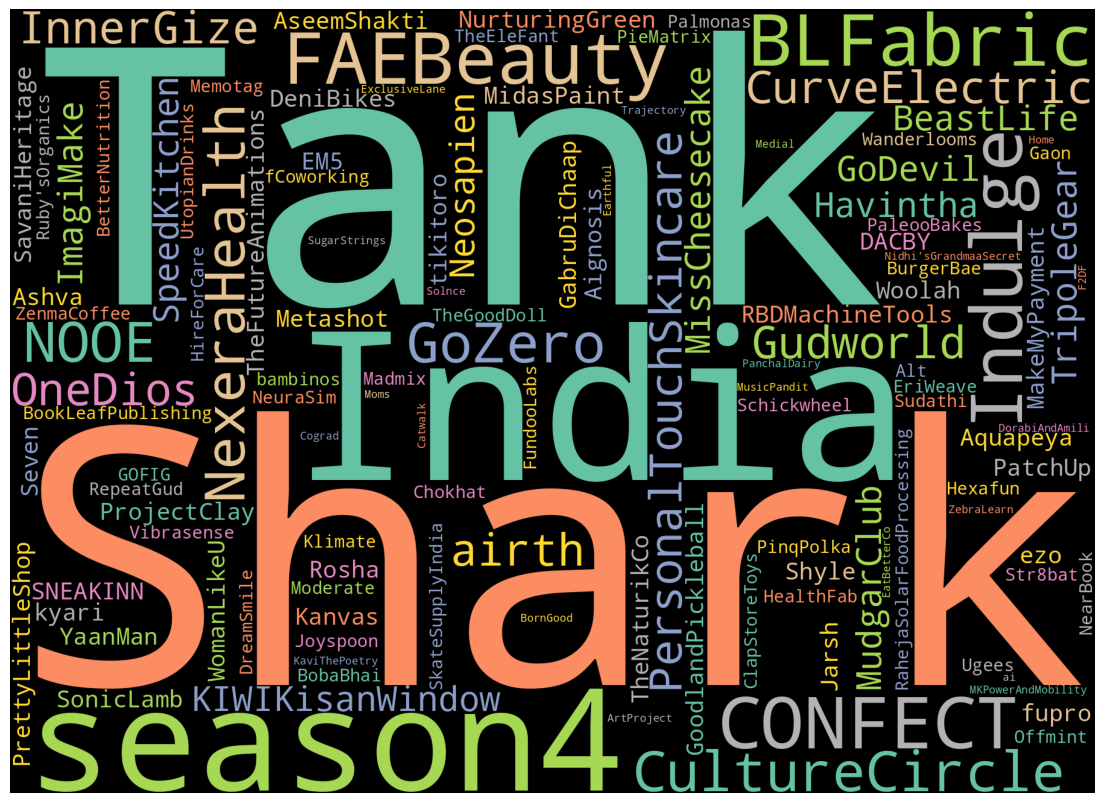

In [55]:
# Word cloud based on Startup Names, in current/latest season (4th season)
text = " Shark Tank India season4 ".join(cat for cat in shark_tank_season4['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1800, height=1300, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(14,14))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🎆 Namita Thapar's Investments

Total investments by Namita 109
Investment amount by Namita 37.47 crores
Equity received by Namita 389.93 % in different companies
Debt/loan amount by Namita 6.59 crores

Company details:
---------------------------------------------------------------------------
       Startup Name                Industry  Namita Investment Amount
        JhaJiAchaar       Food and Beverage                 28.300000
             Bummer          Beauty/Fashion                 37.500000
      SkippiIcePops       Food and Beverage                 20.000000
       Menstrupedia      Children/Education                 50.000000
              Altor           Manufacturing                 25.000000
            Nuutjob          Beauty/Fashion                  8.330000
              Farda          Beauty/Fashion                 15.000000
               Auli          Beauty/Fashion                 75.000000
              Annie      Children/Education                 35.000000
    TheRenalProject          Medical

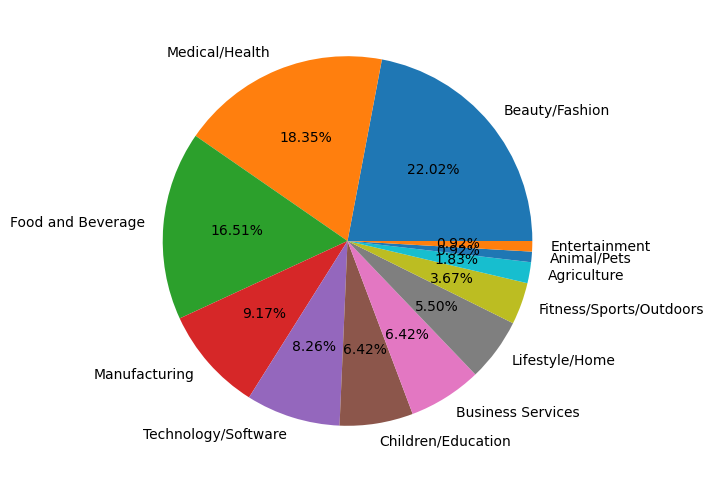

In [56]:
print("Total investments by Namita", shark_tank[shark_tank['Namita Investment Amount']>0][['Namita Investment Amount']].count().to_string()[-3:])
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nNamita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Namita Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Namita Investment Amount']>0] [["Startup Name","Namita Investment Amount","Namita Investment Equity"]].sort_values(by="Namita Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Namita Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## ㊂ Anupam Mittal's Investments

Total investments by Anupam  98
Investment amount by Anupam 32.07 crores
Equity received by Anupam 461.67 % in different companies
Debt/loan amount by Anupam 2.2 crores

Company details:
-------------------------------------------------------------------------------------
          Startup Name                     Industry  Anupam Investment Amount
      HeartUpMySleeves               Beauty/Fashion                 12.500000
                 CosIQ               Beauty/Fashion                 25.000000
            RevampMoto Vehicles/Electrical Vehicles                 50.000000
         SkippiIcePops            Food and Beverage                 20.000000
                Kavach           Children/Education                  2.500000
    VivalyfInnovations               Medical/Health                 28.000000
              Meatyour            Food and Beverage                 10.000000
ARRCOATSurfaceTextures                Manufacturing                 50.000000
                  LOKA   

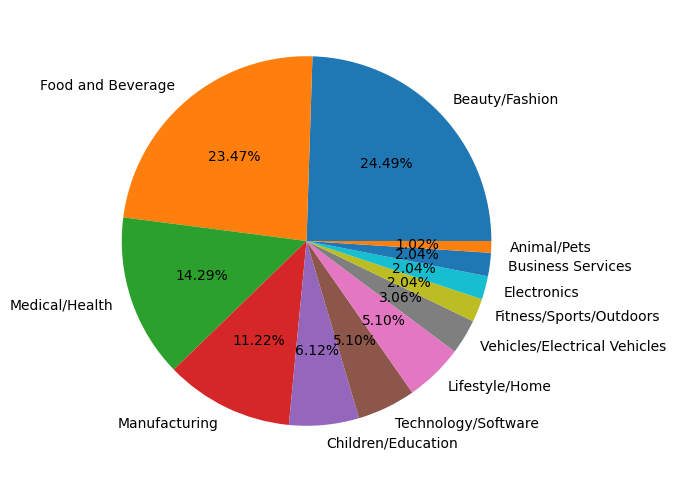

In [57]:
print("Total investments by Anupam", shark_tank[shark_tank['Anupam Investment Amount']>=0][['Anupam Investment Amount']].count().to_string()[-3:])
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*85)
print(shark_tank.loc[shark_tank['Anupam Investment Amount']>=0][["Startup Name","Industry","Anupam Investment Amount"]].to_string(index=False))
print('-'*85)

print("\nAnupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Anupam Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Anupam Investment Amount']>=0] [["Startup Name","Anupam Investment Amount","Anupam Investment Equity"]].sort_values(by="Anupam Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Anupam Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎇 Vineeta Singh's Investments
#### Vineeta's portfolio has 33% Food industry and 29% Beauty/Fashion industry

Total investments by Vineeta  84
Investment amount by Vineeta 27.92 crores
Equity received by Vineeta 318.27 % in different companies
Debt/loan amount by Vineeta 3.61 crores

Company details:
---------------------------------------------------------------------------
             Startup Name                     Industry  Vineeta Investment Amount
            BluePineFoods            Food and Beverage                    25.0000
             BoozScooters Vehicles/Electrical Vehicles                    20.0000
         HeartUpMySleeves               Beauty/Fashion                    12.5000
                     NOCD            Food and Beverage                    20.0000
                    CosIQ               Beauty/Fashion                    25.0000
              JhaJiAchaar            Food and Beverage                    28.3000
            SkippiIcePops            Food and Beverage                    20.0000
               Get-A-Whey            Food and Beverage                    33

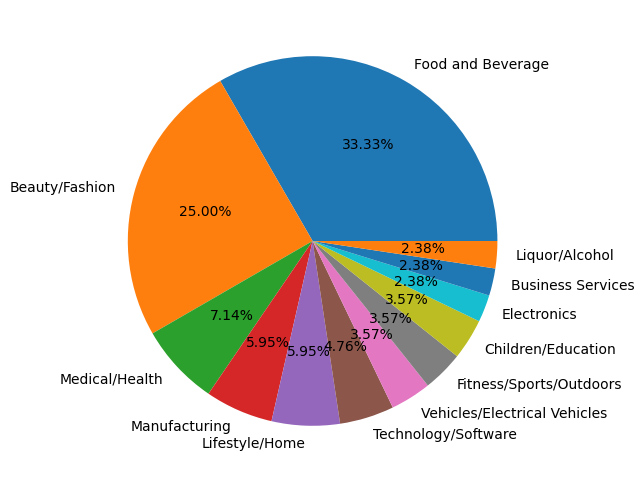

In [58]:
print("Total investments by Vineeta", shark_tank[shark_tank['Vineeta Investment Amount']>0][['Vineeta Investment Amount']].count().to_string()[-3:])
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nVineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Vineeta Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Vineeta Investment Amount']>0] [["Startup Name","Vineeta Investment Amount","Vineeta Investment Equity"]].sort_values(by="Vineeta Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Vineeta Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🚀 Aman Gupta's Investments

Total investments by Aman 136
Investment amount by Aman 50.61 crores
Equity received by Aman 416.31 % in different companies
Debt/loan amount by Aman 7.23 crores

Company details:
---------------------------------------------------------------------------
      Startup Name                     Industry  Aman Investment Amount
     BluePineFoods            Food and Beverage               25.000000
         Peeschute               Beauty/Fashion               75.000000
            Bummer               Beauty/Fashion               37.500000
        RevampMoto Vehicles/Electrical Vehicles               50.000000
     SkippiIcePops            Food and Beverage               20.000000
 RaisingSuperstars           Children/Education               50.000000
            Kavach           Children/Education                2.500000
       BeyondSnack            Food and Beverage               25.000000
             Altor                Manufacturing               25.000000
             Ariro      

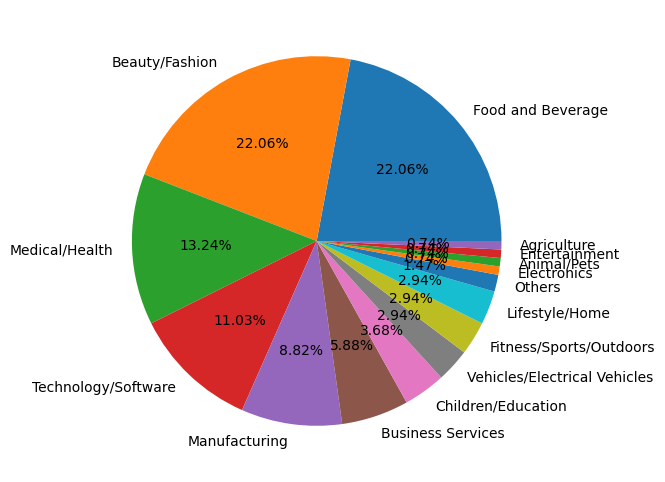

In [59]:
print("Total investments by Aman", shark_tank[shark_tank['Aman Investment Amount']>=0][['Aman Investment Amount']].count().to_string()[-3:])
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Aman Investment Amount']>=0][["Startup Name","Industry","Aman Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Aman Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Aman Investment Amount']>=0] [["Startup Name","Aman Investment Amount","Aman Investment Equity"]].sort_values(by="Aman Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Aman Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎾 Peyush Bansal's Investments

Total investments by Peyush 104
Investment amount by Peyush 40.63 crores
Equity received by Peyush 595.93 % in different companies
Debt/loan amount by Peyush 3.72 crores

Company details:
---------------------------------------------------------------------------
             Startup Name                     Industry  Peyush Investment Amount
       VivalyfInnovations               Medical/Health                 28.000000
                    Ariro                Manufacturing                 25.000000
                  Nuutjob               Beauty/Fashion                  8.330000
                 Meatyour            Food and Beverage                 10.000000
                EventBeep           Children/Education                 10.000000
                     LOKA          Technology/Software                 13.330000
                    Annie           Children/Education                 35.000000
               Carragreen                Manufacturing                 25.000000
       

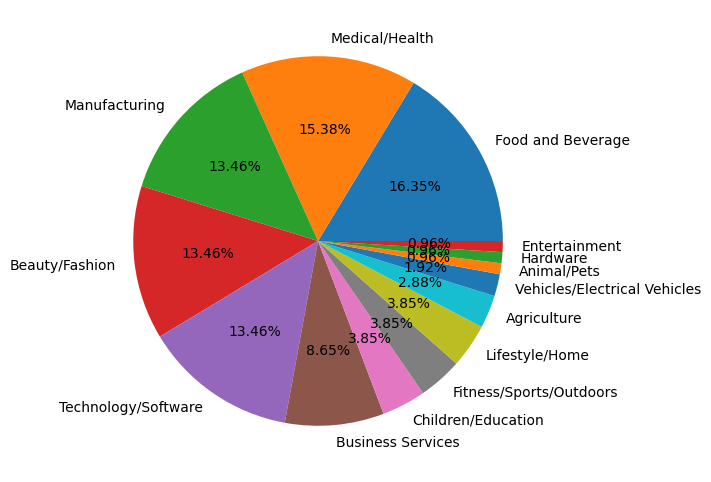

In [60]:
print("Total investments by Peyush", shark_tank[shark_tank['Peyush Investment Amount']>=0][['Peyush Investment Amount']].count().to_string()[-3:])
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Peyush Investment Amount']>=0][["Startup Name","Industry","Peyush Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nPeyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Peyush Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Peyush Investment Amount']>=0] [["Startup Name","Peyush Investment Amount","Peyush Investment Equity"]].sort_values(by="Peyush Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Peyush Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🔥 Ritesh Aggarwal's Investments

Total investments by Ritesh  48
Investment amount by Ritesh 20.36 crores
Equity received by Ritesh 108.49 % in different companies
Debt/loan amount by Ritesh 5.63 crores

Company details:
---------------------------------------------------------------------------
        Startup Name                     Industry  Ritesh Investment Amount
              RodBez Vehicles/Electrical Vehicles                   10.0000
                Blix          Technology/Software                   40.0000
            DilFoods            Food and Beverage                   50.0000
              GudGum            Food and Beverage                   20.0000
            EvaScalp               Medical/Health                   10.0000
          HoneyTwigs            Food and Beverage                   25.0000
            JewelBox               Beauty/Fashion                   40.0000
            DaakRoom            Business Services                   36.0000
         NasherMiles               Beauty/Fashion   

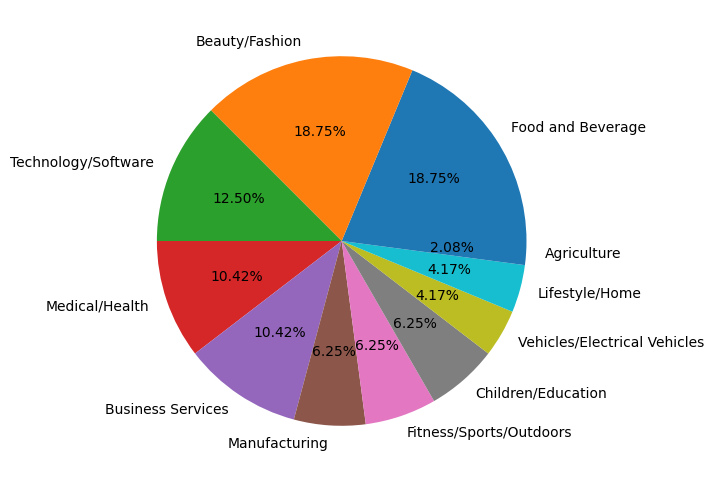

In [61]:
print("Total investments by Ritesh", shark_tank[shark_tank['Ritesh Investment Amount']>=0][['Ritesh Investment Amount']].count().to_string()[-3:])
print("Investment amount by Ritesh", round(shark_tank['Ritesh Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ritesh", round(shark_tank['Ritesh Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ritesh", round(shark_tank['Ritesh Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Ritesh Investment Amount']>=0][["Startup Name","Industry","Ritesh Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRitesh industry wise investments\n")
print(shark_tank[shark_tank['Ritesh Investment Amount']>=0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Ritesh Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Ritesh Investment Amount']>=0] [["Startup Name","Ritesh Investment Amount","Ritesh Investment Equity"]].sort_values(by="Ritesh Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Ritesh Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## ✳️ Amit Jain's Investments

Total investments by Amit 35
Investment amount by Amit 12.34 crores
Equity received by Amit 150.05 % in different companies
Debt/loan amount by Amit 2.45 crores

Company details:
---------------------------------------------------------------------------
 Startup Name                     Industry  Amit Investment Amount
    InsideFPV                Manufacturing                   18.75
    Angrakhaa               Beauty/Fashion                   40.00
    MoppFoods            Food and Beverage                   75.00
       Dobiee            Food and Beverage                   72.00
        Pflow               Medical/Health                   30.00
       ekatra               Lifestyle/Home                   10.00
    licksters            Food and Beverage                   25.00
   ScrapUncle            Business Services                   60.00
       UnStop          Technology/Software                   50.00
  Cakelicious            Food and Beverage                   25.00
     Hor

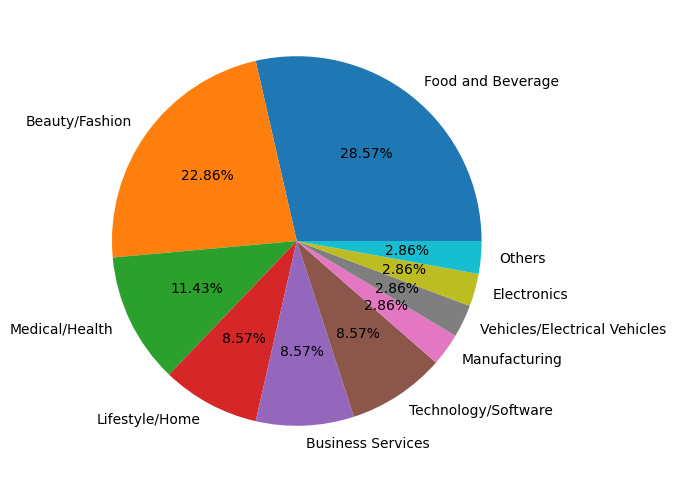

In [62]:
print("Total investments by Amit", shark_tank[shark_tank['Amit Investment Amount']>=0][['Amit Investment Amount']].count().to_string()[-2:])
print("Investment amount by Amit", round(shark_tank['Amit Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Amit", round(shark_tank['Amit Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Amit", round(shark_tank['Amit Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Amit Investment Amount']>0][["Startup Name","Industry","Amit Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAmit industry wise investments\n")
print(shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Amit Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Amit Investment Amount']>0] [["Startup Name","Amit Investment Amount","Amit Investment Equity"]].sort_values(by="Amit Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Amit Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎆 All Guest's Investments
#### (Sharks who presented in fewer episodes/pitches)

Total investments by all Guests 60
Investment amount by all Guests 27.54 crores
Equity received by all Guests 242.21 % in different companies
Debt/loan amount by all Guests 2.03 crores

Company details:
---------------------------------------------------------------------------
             Startup Name                     Industry  Guest Investment Amount         Invested Guest Name
            BluePineFoods            Food and Beverage                25.000000              Ashneer Grover
             BoozScooters Vehicles/Electrical Vehicles                20.000000              Ashneer Grover
                TagzFoods            Food and Beverage                70.000000              Ashneer Grover
            SkippiIcePops            Food and Beverage                20.000000              Ashneer Grover
        RaisingSuperstars           Children/Education                50.000000              Ashneer Grover
              BeyondSnack            Food and Beverage                25.

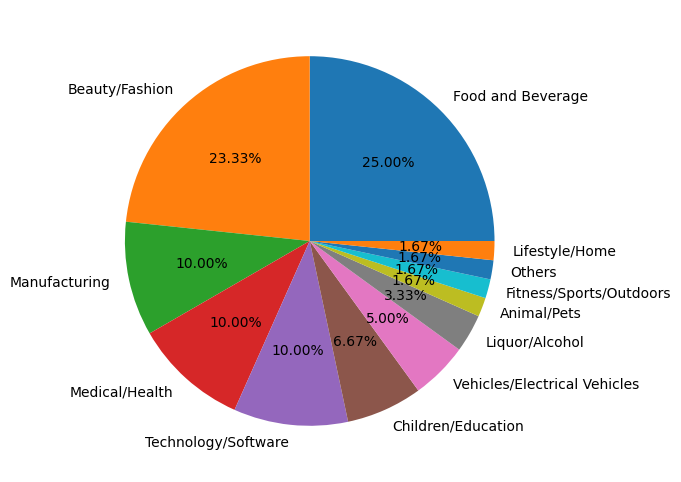

In [63]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>=0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", round(shark_tank['Guest Investment Amount'].sum()/100, 2), "crores")
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by all Guests", round(shark_tank['Guest Debt Amount'].sum()/100, 2), "crores\n")

print("Company details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Invested Guest Name"]].to_string(index=False))
print('-'*75)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (10,6))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=800, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

In [64]:
# Guest sharks and number of companies they invested
shark_tank.loc[shark_tank['Guest Investment Amount'] > 1]['Invested Guest Name'].str.split(',').explode('Invested Guest Name').value_counts().sort_values(ascending=False)

Invested Guest Name
Ashneer Grover      20
Kunal Bahl          11
Azhar Iqubal         8
Ghazal Alagh         7
Radhika Gupta        6
Varun Dua            4
Vikas D Nahar        2
Ronnie Screwvala     2
Deepinder Goyal      1
Viraj Bahl           1
Name: count, dtype: int64

In [65]:
# Investment amount by guests, in lakhs
tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount'] > 0][['Invested Guest Name','Guest Investment Amount']]
tmpdf['Number of Guests'] = tmpdf['Invested Guest Name'].str.count(',') + 1
tmpdf['Invetested Amount per Guest'] = tmpdf['Guest Investment Amount'] / tmpdf['Number of Guests']
tmpdf = tmpdf.set_index(tmpdf.columns.drop('Invested Guest Name',1).tolist())['Invested Guest Name'].str.split(',', expand=True).stack().reset_index().rename(columns={0:'Invested Guest Name'}).loc[:, tmpdf.columns]
round(tmpdf.groupby(["Invested Guest Name"])["Invetested Amount per Guest"].sum().sort_values(ascending=False))

Invested Guest Name
Kunal Bahl          966.0
Ashneer Grover      539.0
Azhar Iqubal        365.0
Deepinder Goyal     200.0
Radhika Gupta       198.0
Ghazal Alagh        160.0
Varun Dua           148.0
Ronnie Screwvala     68.0
Vikas D Nahar        66.0
Viraj Bahl           45.0
Name: Invetested Amount per Guest, dtype: float64

Number of Sharks in Deal
1.0    154
2.0    105
3.0     48
4.0     20
5.0     18
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    45%
2.0    30%
3.0    14%
4.0     6%
5.0     5%
Name: proportion, dtype: object


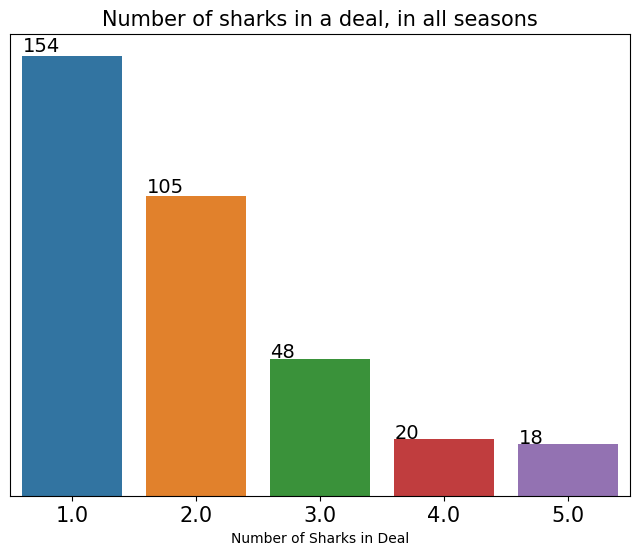

In [66]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 6))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01), size=14)

In [67]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

Startup Name    18
dtype: int64
     Season Number        Startup Name  Total Deal Amount  Total Deal Equity
15               1       SkippiIcePops           100.0000              15.00
50               1  FindYourKicksIndia            50.0000              25.00
64               1              INACAN           100.0000              10.00
80               1  SunfoxTechnologies           100.0000               6.00
209              2              Snitch           150.0000               1.50
239              2            Mahantam            30.0000              20.00
274              2         Pharmallama           200.0000               5.00
311              2           Sahayatha           100.0000              10.00
357              3            JewelBox           200.0000               6.00
365              3         NasherMiles           300.0000               1.50
423              3           LittleBox            75.0000               2.50
435              3           Dharaksha      

In [68]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Namita/Aman did most number of solo deals, than any other Shark

Namita Investment Amount    32
Aman Investment Amount      31
Peyush Investment Amount    21
dtype: int64

In [69]:
# # Sharks
# tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 2][amt_cols].reset_index(drop=True).stack()
# tmp
# tmp = pd.MultiIndex.from_frame(shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 2][amt_cols])
# tmp
# tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 2][amt_cols].reset_index(drop=True).stack().to_frame().add_suffix('Amount').reset_index()
# tmp.groupby(['level_0','level_1']).count()
# tmp
# tmp2 = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 2][amt_cols]
# tmp2

In [70]:
# Sharks with most number of pitches presence, in all seasons
present_cols = shark_tank.columns[shark_tank.columns.str.endswith(' Present')].tolist()
tmp = shark_tank[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(3)

# Aman/Anupam was there in most number of pitches, in all seasons

Aman Present      525.0
Anupam Present    522.0
Namita Present    469.0
dtype: float64

In [71]:
# Sharks with most number of pitches presence, in current/latest season (4th Season)
tmp = shark_tank.loc[shark_tank['Season Number'] == 4][present_cols]
tmp.sum().sort_values(ascending=False).nlargest(4)

Aman Present       105.0
Guest Present      101.0
Anupam Present      98.0
Vineeta Present     83.0
dtype: float64

In [72]:
# Anchor and number of pitches, they hosted
shark_tank.groupby('Anchor').size()

Anchor
Aashish Solanki                 39
Rahul Dua                      319
Rannvijay Singh                152
Sahiba Bali                     12
Sahiba Bali/Aashish Solanki     68
Snehil Dixit Mehra               7
dtype: int64

In [73]:
# Anchor and number of episodes, they hosted
pd.pivot_table(shark_tank, values='Episode Number', columns='Anchor', aggfunc=lambda x: len(x.unique()))

Anchor          Aashish Solanki  Rahul Dua  Rannvijay Singh  Sahiba Bali  \
Episode Number               13         52               37            4   

Anchor          Sahiba Bali/Aashish Solanki  Snehil Dixit Mehra  
Episode Number                           23                   2

Pitchers State
Maharashtra          161
Delhi                 88
Karnataka             67
Gujarat               56
Haryana               46
Uttar Pradesh         39
Rajasthan             29
Telangana             24
West Bengal           20
Punjab                18
Madhya Pradesh        15
Tamil Nadu            12
Kerala                 8
Bihar                  8
Jammu & Kashmir        6
Goa                    6
Uttarakhand            5
Jharkhand              5
Assam                  5
Chhattisgarh           3
Himachal Pradesh       2
Andhra Pradesh         2
Arunachal Pradesh      2
Odisha                 1
Meghalaya              1
Name: count, dtype: int64 



<Axes: ylabel='Pitchers State'>

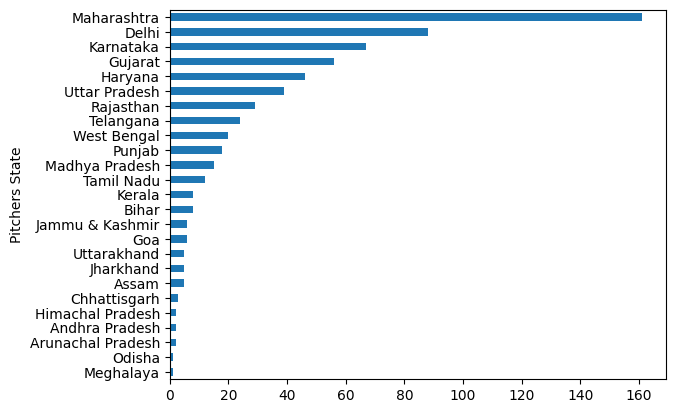

In [74]:
# Indian state-wise startups
print(shark_tank['Pitchers State'].str.split(',').explode('Pitchers State').value_counts(), "\n")
shark_tank['Pitchers State'].str.split(',').explode('Pitchers State').value_counts().sort_values().plot.barh()

In [75]:
# Top 20 Indian Cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Indian top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [76]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# 50L/1Cr is most frequently asked amount

# Original Ask Amount (in lakhs) and Number of times asked

Original Ask Amount
50.0     133
100.0    112
75.0      63
60.0      38
80.0      35
40.0      25
150.0     25
30.0      23
70.0      17
90.0      15
dtype: int64

In [77]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# 1% to 2% are most frequently offered equities

# Original Offered Equity (in %) and Number of times offered

Original Offered Equity
1.0     134
2.0      88
5.0      81
3.0      48
10.0     46
2.5      39
4.0      34
0.5      21
1.5      21
7.5      13
dtype: int64

In [78]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Sharks mostly invested between 50K-1lakh per deal

# Total Deal Amount (in lakhs) and Number of times invested

Total Deal Amount
50.0     71
100.0    64
75.0     30
60.0     23
40.0     19
30.0     15
25.0     14
80.0     13
20.0     11
200.0    11
dtype: int64

In [79]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Sharks are expecting around 5-10% equity, in a deal

# Total Deal Equity (in %) and Number of times invested

Total Deal Equity
10.0    41
4.0     31
5.0     31
1.0     30
2.0     23
3.0     21
20.0    19
6.0     17
2.5     15
15.0    15
dtype: int64

In [80]:
# Most frequently asked amount (in lakhs), deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
50.0              72.0                28.0
100.0             71.0                29.0
75.0              68.0                32.0
60.0              63.0                37.0
80.0              66.0                34.0
150.0             80.0                20.0
40.0              72.0                28.0
30.0              74.0                26.0
70.0              88.0                12.0
25.0              67.0                33.0

In [81]:
# Frequently asked amount (in lakhs), deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(7)

deal_percentage  no_deal_percentage
30000.0              0.0               100.0
500.0                0.0               100.0
350.0                0.0               100.0
1000.0               0.0               100.0
220.0                0.0               100.0
68.7                 0.0               100.0
125.0                0.0               100.0

In [82]:
# Most frequently asked equity, deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
1.0              72.0                28.0
2.0              78.0                22.0
5.0              52.0                48.0
3.0              69.0                31.0
4.0              85.0                15.0
10.0             61.0                39.0
2.5              62.0                38.0
0.5              95.0                 5.0
1.5              71.0                29.0
7.5              62.0                38.0

In [83]:
# Fequently asked equity, deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Received Offer']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(5)

deal_percentage  no_deal_percentage
2.20              0.0               100.0
4.16              0.0               100.0
3.33              0.0               100.0
2.10              0.0               100.0
1.80              0.0               100.0

In [84]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Indian Shark Tank, ask for 50L-1cr with 1-5% equity ✅

Original Ask Amount  Original Offered Equity
100.0                1.0                        23
50.0                 2.0                        17
                     5.0                        17
100.0                2.0                        17
50.0                 1.0                        16
100.0                2.5                        10
70.0                 1.0                         9
75.0                 1.0                         9
                     3.0                         9
60.0                 2.0                         8
dtype: int64

In [85]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (in lakhs) and Number of times asked (but rejected by sharks) ❌

Original Ask Amount
50.0     37
100.0    32
75.0     20
60.0     14
80.0     12
90.0      9
200.0     9
40.0      7
30.0      6
20.0      5
dtype: int64

In [86]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered (but rejected by sharks) ❌

Original Offered Equity
5.0     39
1.0     37
2.0     19
10.0    18
2.5     15
3.0     15
1.5      6
4.0      5
7.5      5
6.0      4
dtype: int64

In [87]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Received Offer'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(5)

# You may not get deal, if you ask for 1 crore with 1% equity or 50K with 5%/10% equity 🔴

Original Ask Amount  Original Offered Equity
50.0                 5.0                        11
100.0                1.0                        11
                     2.5                         8
50.0                 1.0                         5
                     10.0                        5
dtype: int64

In [88]:
# shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
# shp_gdf['st_nm'] = shp_gdf['st_nm'].str.replace('NCT of Delhi', 'Delhi')
# shp_gdf['st_nm']

In [89]:
# tmpdf = shark_tank[["Season Number","Pitchers State","Total Deal Amount"]]
# tmpdf = tmpdf.set_index(tmpdf.columns.drop('Pitchers State',1).tolist())['Pitchers State'].str.split(',', expand=True).stack().reset_index().rename(columns={0:'Pitchers State'}).loc[:, tmpdf.columns]
# tmpdf.contn.value_counts(dropna=False)
# tmpdf.set_index('Pitchers State')
# tmpdf

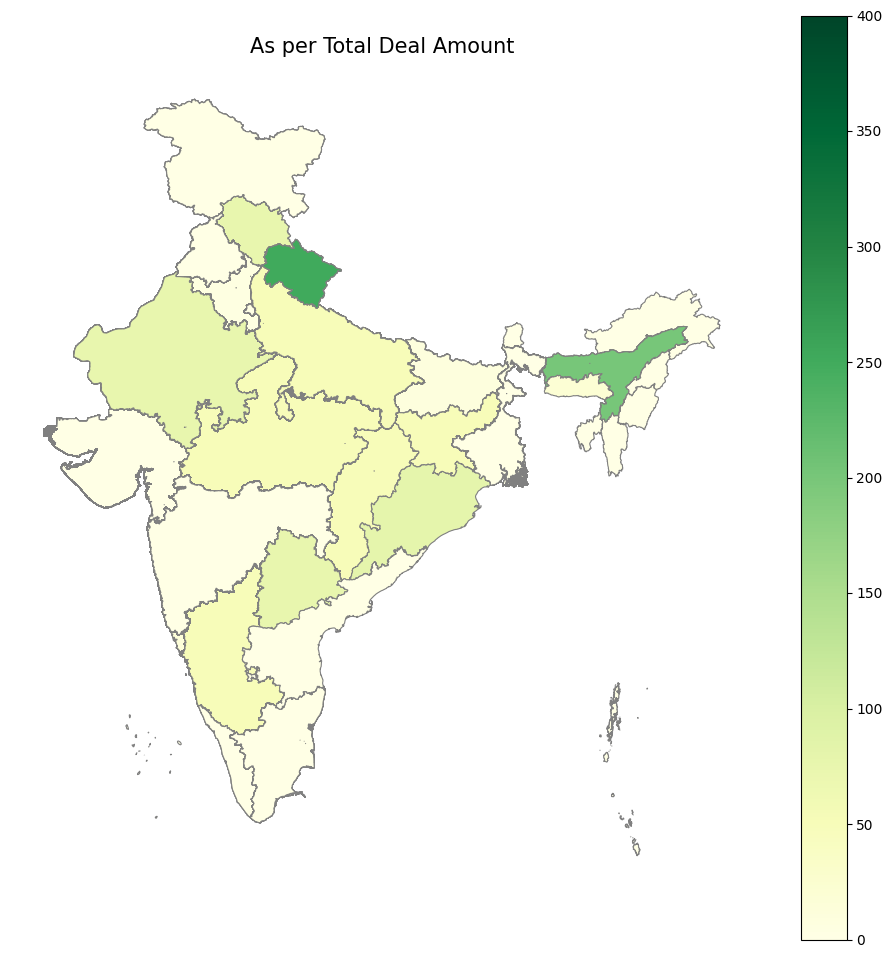

In [90]:
shp_gdf = gpd.read_file('../input/india-gis-data/India States/Indian_states.shp')
shp_gdf['st_nm'] = shp_gdf['st_nm'].str.replace('NCT of Delhi', 'Delhi')
merged = shp_gdf.set_index('st_nm').join(shark_tank.set_index('Pitchers State'))
merged['Total Deal Amount'] = merged['Total Deal Amount'].fillna(0)

fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('As per Total Deal Amount', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Total Deal Amount', cmap='YlGn', linewidth=0.8, ax=ax, edgecolor='0.5', legend=True)

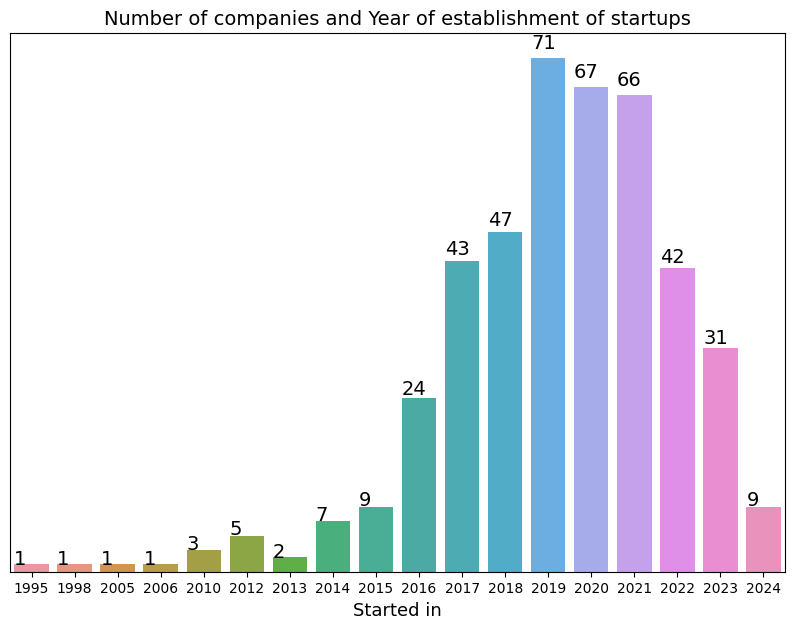

In [91]:
# All seasons, startup companies incorporated year
fig = plt.figure(figsize=(10, 7))
plt.title('Number of companies and Year of establishment of startups', size=14)
tmp = shark_tank.loc[shark_tank['Started in'].notnull()]
ax = sns.countplot(data = tmp, x = 'Started in')
ax.set_xlabel('Started in', fontsize=13)
plt.yticks([])
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [92]:
# Some companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    58
dtype: int64


Season Number               Startup Name  Original Ask Amount  \
0                1              BluePineFoods              50.0000   
10               1                JhaJiAchaar              50.0000   
15               1              SkippiIcePops              45.0000   
37               1                      Annie              30.0000   
39               1              TheYarnBazaar              50.0000   
43               1            HammerLifestyle              30.0000   
59               1                    WeSTOCK              50.0000   
64               1                     INACAN              50.0000   
76               1                 TheSassBar              40.0000   
89               1                    HumpyA2              75.0000   
109              1                  TweekLabs              40.0000   
110              1                     Proxgy              35.0000   
118              1                   SneaKare              20.0000   
152              2                      Hoovu              80.0000   
161              2             GearHeadMotors              75.0000   
178              2                Zillionaire              50.0000   
216              2                   Broomees              80.0000   
219              2                    PadCare              50.0000   
223              2                     Geeani              75.0000   
230              2                     UnStop             100.0000   
240              2                  MindPeers              53.0000   
257              2                    CureSee              40.0000   
274              2                Pharmallama             100.0000   
283              2           What'sUpWellness              50.0000   
333              3                   DilFoods              50.0000   
334              3          AIKavach/Panoplia              50.0000   
337              3                  Kalakaram              50.0000   
343              3                   WYLDCard              50.0000   
348              3                GoenchiFeni             100.0000   
351              3                     GudGum              50.0000   
357              3                   JewelBox             100.0000   
363              3               ALittleExtra              48.0000   
372              3                   HyperLab              10.0000   
394              3                    ToHands              55.0000   
405              3                   WiseLife              60.0000   
453              3                   FarmDidi              50.0000   
469              3                       PTal              50.0000   
476              3                  Canvaloop             100.0000   
482              4              CultureCircle             120.0000   
484              4                       NOOE              50.0000   
488              4                      airth              60.0000   
490              4                  InnerGize              54.0000   
492              4            KIWIKisanWindow              50.0000   
518              4                   Aignosis              50.0000   
528              4               TheNaturikCo              50.0000   
529              4                   Metashot              80.0000   
530              4               GabruDiChaap              70.0000   
531              4                    YaanMan              50.0000   
534              4                        EM5              70.0000   
541              4              ClapStoreToys              80.0000   
542              4  RahejaSolarFoodProcessing              50.0000   
546              4                  BurgerBae             100.0000   
547              4                   BobaBhai              50.0000   
555              4                 FundooLabs              60.0000   
560              4                    Offmint               0.0001   
570              4                  HealthFab             100.0000   
573            

In [93]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number      Startup Name  Original Offered Equity  \
0                1     BluePineFoods                      5.0   
1                1      BoozScooters                     15.0   
2                1  HeartUpMySleeves                     10.0   
3                1         TagzFoods                      1.0   
7                1         Peeschute                      4.0   
..             ...               ...                      ...   
588              4            Cograd                      2.0   
590              4          Earthful                      1.0   
591              4        Trajectory                      2.0   
593              4              F2DF                      1.0   
595              4         Moms Home                      1.0   

     Total Deal Equity  
0                16.00  
1                50.00  
2                30.00  
3                 2.75  
7                 6.00  
..                 ...  
588               6.00  
590               2.50  
591               3.00  
593               2.00  
595               2.00  

[280 rows x 4 columns]

In [94]:
# Below companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    40
dtype: int64


Season Number         Startup Name  Valuation Requested  Deal Valuation
20               1               Kavach            50.000000       50.000000
22               1          BeyondSnack          2000.000000     2000.000000
45               1              Cocofit             0.000000        0.000000
86               1    WattTechnovations             0.000000        0.000000
171              2       TheSimplySalad           300.000000      300.000000
185              2              Janitri          4000.000000     4000.000000
203              2            NeoMotion         10000.000000    10000.000000
219              2              PadCare          2500.000000     2500.000000
223              2               Geeani          1000.000000     1000.000000
240              2            MindPeers          5300.000000     5300.000000
243              2          DhruvVidyut             0.000000        0.000000
253              2      TheHealthyBinge          1000.000000     1000.000000
311              2            Sahayatha          1000.000000     1000.000000
314              2             NishHair          5000.000000     5000.000000
334              3    AIKavach/Panoplia          4000.000000     4000.000000
341              3               WeHear         25000.000000    25000.000000
354              3           HoneyTwigs          2500.000000     2500.000000
355              3               Koparo          7000.000000     7000.000000
363              3         ALittleExtra           800.000000      800.000000
390              3                Matri          1500.000000     1500.000000
397              3               Cosmix         10000.000000    10000.000000
399              3       PolishMePretty           100.000000      100.000000
405              3             WiseLife          3000.000000     3000.000000
408              3      AvataarSkincare          7000.000000     7000.000000
412              3           ModelVerse           250.000000      250.000000
414              3         TheShellHair          1000.000000     1000.000000
416              3               MEPACK            70.000000       70.000000
435              3            Dharaksha             1.250000        1.250000
449              3  CoratiaTechnologies          8000.000000     8000.000000
451              3            Xmachines          1800.000000     1800.000000
468              3           NeonAttack          2500.000000     2500.000000
504              4          ProjectClay           150.000000      150.000000
518              4             Aignosis          1250.000000     1250.000000
532              4            SonicLamb          5000.000000     5000.000000
557              4             EriWeave           166.666667      166.666667
564              4      BetterNutrition          6000.000000     6000.000000
567              4             NearBook           200.000000      200.000000
577              4             Palmonas         12600.000000    12600.000000
582              4       DorabiAndAmili          2500.000000     2500.000000
589              4          EatBetterCo         10000.000000    10000.000000

In [95]:
# 3 companies got more valuation than they pitched, JhaJi Achaar received after the Season (in 2023)
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number Startup Name  Valuation Requested  Deal Valuation
10               1  JhaJiAchaar               500.00          1007.0
372              3     HyperLab              1000.00          2500.0
560              4      Offmint                 0.01           250.0

In [96]:
# Some companies were on pre-revenue or didn't had any revenue (as of pitching day)
print(shark_tank.loc[shark_tank['Yearly Revenue'] == 0]['Startup Name'].count())
shark_tank.loc[shark_tank['Yearly Revenue'] == 0]

24


Season Number        Startup Name  Episode Number  Pitch Number  \
9                1               CosIQ               4            10   
23               1  VivalyfInnovations               8            24   
24               1        MotionBreeze               8            25   
42               1       GoodGoodPiggy              14            43   
77               1          KGAgrotech              24            78   
83               1     JulaaAutomation              26            84   
98               1            Scholify              30            99   
100              1          Sabjikothi              31           101   
114              1             On2Cook              34           115   
131              1           Scintiglo               0           132   
205              2            Sayonara              18           206   
206              2                 PMV              19           207   
257              2             CureSee              34           258   
264              2           HoloKitab              36           265   
277              2                Hood              40           278   
295              2           WaggyZone              44           296   
350              3              Vecros              10           351   
415              3                Rize              32           416   
451              3           Xmachines              44           452   
455              3             Prorata              45           456   
457              3       AlienVersions              46           458   
460              3             Melooha              47           461   
475              3        CoolTheGlobe              52           476   
559              4            NeuraSim              28           560   

    Season Start Season End Original Air Date  \
9      20-Dec-21   4-Feb-22         23-Dec-21   
23     20-Dec-21   4-Feb-22         29-Dec-21   
24     20-Dec-21   4-Feb-22         29-Dec-21   
42     20-Dec-21   4-Feb-22          6-Jan-22   
77     20-Dec-21   4-Feb-22         20-Jan-22   
83     20-Dec-21   4-Feb-22         24-Jan-22   
98     20-Dec-21   4-Feb-22         28-Jan-22   
100    20-Dec-21   4-Feb-22         31-Jan-22   
114    20-Dec-21   4-Feb-22          3-Feb-22   
131    20-Dec-21   4-Feb-22               NaN   
205     2-Jan-23  10-Mar-23         25-Jan-23   
206     2-Jan-23  10-Mar-23         26-Jan-23   
257     2-Jan-23  10-Mar-23         16-Feb-23   
264     2-Jan-23  10-Mar-23         20-Feb-23   
277     2-Jan-23  10-Mar-23         24-Feb-23   
295     2-Jan-23  10-Mar-23          2-Mar-23   
350    22-Jan-24  31-Mar-24          2-Feb-24   
415    22-Jan-24  31-Mar-24          5-Mar-24   
451    22-Jan-24  31-Mar-24         21-Mar-24   
455    22-Jan-24  31-Mar-24         22-Mar-24   
457    22-Jan-24  31-Mar-24         25-Mar-24   
460    22-Jan-24  31-Mar-24         26-Mar-24   
475    22-Jan-24  31-Mar-24         31-Mar-24   
559     6-Jan-25        NaN         12-Feb-25   

                                Episode Title                       Anchor  \
9                    Entrepreneurship Ki Wave              Rannvijay Singh   
23          Shark Ko Impress Karne Wale Ideas              Rannvijay Singh   
24          Shark Ko Impress Karne Wale Ideas              Rannvijay Singh   
42                    Naye Aur Nayab Pitchers              Rannvijay Singh   
77        A Decade Of Indian Entrepreneurship              Rannvijay Singh   
83                        Revolutionary Ideas              Rannvijay Singh   
98                        Sharks Ki Expertise              Rannvijay Singh   
100                  Entrepreneurship Ki Raah              Rannvijay Singh   
114                         Scaling Ambitions              Rannvijay Singh   
131                                    Unseen              Rannvijay Singh   
205             Business Ideas With Potential                    Rahul Dua   
206                 Building Brands For In

In [97]:
# Many companies were on burning/paying money from their pocket, without any profit (as of pitching day)
print(shark_tank[shark_tank['Cash Burn'] == 'yes']['Startup Name'].count())
shark_tank.loc[shark_tank['Cash Burn'] == 'yes']

93


Season Number   Startup Name  Episode Number  Pitch Number Season Start  \
62               1  TheStatePlate              20            63    20-Dec-21   
81               1         Alpino              25            82    20-Dec-21   
105              1     GrowFitter              32           106    20-Dec-21   
137              1   ZyppElectric               0           138    20-Dec-21   
140              1       HappyBar               0           141    20-Dec-21   
..             ...            ...             ...           ...          ...   
583              4     ZebraLearn              36           584     6-Jan-25   
589              4    EatBetterCo              38           590     6-Jan-25   
590              4       Earthful              38           591     6-Jan-25   
595              4      Moms Home              40           596     6-Jan-25   
596              4        Catwalk              40           597     6-Jan-25   

    Season End Original Air Date                                Episode Title  \
62    4-Feb-22         14-Jan-22                           A Variety Of Ideas   
81    4-Feb-22         21-Jan-22                    An Ocean Of Opportunities   
105   4-Feb-22          1-Feb-22                          The Road To Success   
137   4-Feb-22               NaN                                       Unseen   
140   4-Feb-22               NaN                                       Unseen   
..         ...               ...                                          ...   
583        NaN         24-Feb-25      Sustainability, Innovation And Artistry   
589        NaN         26-Feb-25  Smart Learning, Healthy Eating And Wellness   
590        NaN         26-Feb-25  Smart Learning, Healthy Eating And Wellness   
595        NaN         28-Feb-25                      Big Ideas, Bold Pitches   
596        NaN         28-Feb-25                      Big Ideas, Bold Pitches   

                          Anchor                      Industry  \
62               Rannvijay Singh             Food and Beverage   
81               Rannvijay Singh             Food and Beverage   
105              Rannvijay Singh           Technology/Software   
137              Rannvijay Singh  Vehicles/Electrical Vehicles   
140              Rannvijay Singh             Food and Beverage   
..                           ...                           ...   
583  Sahiba Bali/Aashish Solanki            Children/Education   
589                  Sahiba Bali             Food and Beverage   
590                  Sahiba Bali                Medical/Health   
595  Sahiba Bali/Aashish Solanki            Children/Education   
596  Sahiba Bali/Aashish Solanki             Food and Beverage   

               Business Description               Company Website  Started in  \
62                       Delicacies    https://thestateplate.com/        2020   
81   Roasted Peanut butter Products         https://alpino.store/        2016   
105                     Rewards App   https://www.growfitter.com/        2021   
137             Electrical Vehicles             https://zypp.app/        2017   
140       FitSport delicious snacks      https://www.fitsport.me/        2019   
..                              ...                           ...         ...   
583            Modern book platform       https://zebralearn.com/        2021   
589        Healthy delicious snacks      https://eatbetterco.com/        <NA>   
590     Health-boosting supplements          https://earthful.me/        <NA>   
595     Sustainable baby essentials      https://www.momshome.in/        <NA>   
596           Non-alcoholic spirits  https://catwalkbotanics.com/        <NA>   

     Number of Presenters  Male Presenters  Female Presenters  \
62                      2                1                  1   
81                      4                4               <NA>   
105                     2                2               <NA>   
137                     2                1   

In [98]:
# Few companies were having patents/IP, in India/outside (as of pitching day)
print(shark_tank[shark_tank['Has Patents'] == 'yes']['Startup Name'].count())
shark_tank.loc[shark_tank['Has Patents'] == 'yes']

57


Season Number       Startup Name  Episode Number  Pitch Number  \
6                1         qZenseLabs               3             7   
15               1      SkippiIcePops               6            16   
19               1           Torch-it               7            20   
24               1       MotionBreeze               8            25   
38               1         Carragreen              13            39   
53               1         RoadBounce              17            54   
61               1          Magiclock              19            62   
66               1       Sid07Designs              21            67   
83               1    JulaaAutomation              26            84   
110              1             Proxgy              33           111   
145              1            Canebot               0           146   
205              2           Sayonara              18           206   
245              2             Tipayi              31           246   
266              2           Hornback              37           267   
268              2          nanoclean              37           269   
281              2            Trunome              41           282   
297              2             Subhag              45           298   
311              2          Sahayatha              49           312   
332              3             80Wash               4           333   
334              3  AIKavach/Panoplia               5           335   
336              3             Aretto               6           337   
341              3             WeHear               7           342   
344              3        upliance.ai               8           345   
352              3           EvaScalp              11           353   
360              3               WALK              14           361   
364              3           Assembly              15           365   
367              3            Without              16           368   
368              3               Kibo              16           369   
372              3           HyperLab              18           373   
373              3        EcoBiotraps              18           374   
374              3              Hoora              18           375   
376              3            Zerodor              19           377   
387              3            Artinci              23           388   
390              3              Matri              24           391   
396              3            Aroleap              26           397   
400              3           GridMats              27           401   
402              3      CreativeHatti              28           403   
406              3         Cervicheck              29           407   
418              3             Vobble              33           419   
430              3     GoldenFeathers              37           431   
447              3           Nemocare              43           448   
459              3           KikoLive              47           460   
460              3            Melooha              47           461   
471              3           SmartMop              51           472   
488              4              airth               4           489   
490              4          InnerGize               5           491   
498              4          ImagiMake               7           499   
508              4              Jarsh              11           509   
513              4              fupro              13           514   
516              4              Seven              14           517   
523              4              Ashva              16           524   
526              4         MidasPaint              17           527   
529              4           Metashot              18           530   
537              4            Str8bat              21           538   
559              4           NeuraSim              28           560   
566              4         Vi

## SharkTank Australia statistics & data analysis https://www.kaggle.com/code/thirumani/shark-tank-australia-data-analysis

In [99]:
# Companies that were part of match off
print(shark_tank[shark_tank['Part of Match off'] == 'yes']['Startup Name'].count(), "companies were part of match off/face off")
shark_tank.loc[shark_tank['Part of Match off'] == 'yes']

6 companies were part of match off/face off


Season Number    Startup Name  Episode Number  Pitch Number Season Start  \
364              3        Assembly              15           365    22-Jan-24   
365              3     NasherMiles              15           366    22-Jan-24   
403              3       CandidMen              28           404    22-Jan-24   
404              3         Flyrobe              28           405    22-Jan-24   
502              4  NurturingGreen               9           503     6-Jan-25   
503              4           kyari               9           504     6-Jan-25   

    Season End Original Air Date                       Episode Title  \
364  31-Mar-24          9-Feb-24                 Shark Tank Showdown   
365  31-Mar-24          9-Feb-24                 Shark Tank Showdown   
403  31-Mar-24         28-Feb-24  Navigating The Tank With New Ideas   
404  31-Mar-24         28-Feb-24  Navigating The Tank With New Ideas   
502        NaN         16-Jan-25             Green Ventures Face Off   
503        NaN         16-Jan-25             Green Ventures Face Off   

                          Anchor        Industry  \
364                    Rahul Dua  Beauty/Fashion   
365                    Rahul Dua  Beauty/Fashion   
403                    Rahul Dua  Beauty/Fashion   
404                    Rahul Dua  Beauty/Fashion   
502  Sahiba Bali/Aashish Solanki  Lifestyle/Home   
503  Sahiba Bali/Aashish Solanki  Lifestyle/Home   

                          Business Description              Company Website  \
364                                Travel Bags  https://assemblytravel.com/   
365                                Travel Bags     https://nashermiles.com/   
403            Fashion Rental Platform for Men        https://candidmen.in/   
404  Fashion Rental Platform for Men and Women    https://flyrobe.com/home/   
502                       Online plant nursery   https://nurturinggreen.in/   
503                       Online plant nursery            https://kyari.co/   

     Started in  Number of Presenters  Male Presenters  Female Presenters  \
364        2018                     2                2               <NA>   
365        2017                     3                2                  1   
403        2017                     2                1                  1   
404        2020                     1             <NA>                  1   
502        2010                     1                1                  0   
503        2022                     2                2                  0   

     Transgender Presenters  Couple Presenters Pitchers Average Age  \
364                    <NA>                  0               Middle   
365                    <NA>                  1               Middle   
403                    <NA>                  0               Middle   
404                    <NA>                  0               Middle   
502                    <NA>                  0               Middle   
503                    <NA>                  0               Middle   

    Pitchers City  Pitchers State  Yearly Revenue  Monthly Sales  \
364      Gurugram         Haryana            1150            NaN   
365        Mumbai     Maharashtra            5700            NaN   
403     Bangalore       Karnataka             210            NaN   
404         Delhi           Delhi             290           63.0   
502       Lucknow   Uttar Pradesh            2800          400.0   
503        Indore  Madhya Pradesh            1048          263.0   

     Gross Margin  Net Margin  ...  Aman Investment Amount  \
364           NaN        <NA>  ...                     NaN   
365           NaN        <NA>  ...                    60.0   
403           NaN        <NA>  ...                     NaN   
404           NaN          16  ...                    50.0   
502           NaN        <NA>  ...                     NaN   
503          70.0        <NA>  ...                     NaN   

    Aman Investment Equity  Aman Debt Amount Peyush Investment 

In [100]:
# Few companies were bootstrapped (as of pitching day)
print(shark_tank.groupby('Bootstrapped').size(),"\n")
print(shark_tank[shark_tank['Bootstrapped'] == 'yes']['Startup Name'].count(), "bootstrapped companies")
shark_tank.loc[shark_tank['Bootstrapped'] == 'yes']

Bootstrapped
funded    66
yes       32
dtype: int64 

32 bootstrapped companies


Season Number         Startup Name  Episode Number  Pitch Number  \
385              3                Refit              22           386   
386              3   HouseOfBeautyIndia              22           387   
397              3               Cosmix              26           398   
401              3  UnclePetersPanCakes              27           402   
403              3            CandidMen              28           404   
414              3         TheShellHair              32           415   
417              3           BaccaBucci              33           418   
419              3           BeUNatural              33           420   
421              3             Niblerzz              34           422   
422              3               Sorich              34           423   
423              3            LittleBox              35           424   
431              3           Myracle.io              37           432   
438              3             Fit&Flex              40           439   
440              3              Smotect              40           441   
441              3             Katidhan              41           442   
444              3              SpecOps              42           445   
456              3            Indigifts              46           457   
461              3          FUTRStudios              47           462   
462              3               Allter              48           463   
463              3     FirstBudOrganics              48           464   
493              4          TripoleGear               6           494   
496              4         SpeedKitchen               7           497   
510              4                Shyle              12           511   
513              4                fupro              13           514   
519              4                Rosha              15           520   
522              4             tikitoro              16           523   
530              4         GabruDiChaap              18           531   
531              4              YaanMan              19           532   
555              4           FundooLabs              27           556   
572              4              Sudathi              32           573   
582              4       DorabiAndAmili              36           583   
591              4           Trajectory              39           592   

    Season Start Season End Original Air Date  \
385    22-Jan-24  31-Mar-24         20-Feb-24   
386    22-Jan-24  31-Mar-24         20-Feb-24   
397    22-Jan-24  31-Mar-24         26-Feb-24   
401    22-Jan-24  31-Mar-24         27-Feb-24   
403    22-Jan-24  31-Mar-24         28-Feb-24   
414    22-Jan-24  31-Mar-24          5-Mar-24   
417    22-Jan-24  31-Mar-24          6-Mar-24   
419    22-Jan-24  31-Mar-24          6-Mar-24   
421    22-Jan-24  31-Mar-24          7-Mar-24   
422    22-Jan-24  31-Mar-24          7-Mar-24   
423    22-Jan-24  31-Mar-24          8-Mar-24   
431    22-Jan-24  31-Mar-24         12-Mar-24   
438    22-Jan-24  31-Mar-24         15-Mar-24   
440    22-Jan-24  31-Mar-24         15-Mar-24   
441    22-Jan-24  31-Mar-24         18-Mar-24   
444    22-Jan-24  31-Mar-24         19-Mar-24   
456    22-Jan-24  31-Mar-24         25-Mar-24   
461    22-Jan-24  31-Mar-24         26-Mar-24   
462    22-Jan-24  31-Mar-24         27-Mar-24   
463    22-Jan-24  31-Mar-24         27-Mar-24   
493     6-Jan-25        NaN         13-Jan-25   
496     6-Jan-25        NaN         14-Jan-25   
510     6-Jan-25        NaN         21-Jan-25   
513     6-Jan-25        NaN         22-Jan-25   
519     6-Jan-25        NaN         24-Jan-25   
522     6-Jan-25        NaN         27-Jan-25   
530     6-Jan-25        NaN         29-Jan-25   
531     6-Jan-25        NaN         30-Jan-25   
555     6-Jan-25        NaN         11-Feb-25   
572     6-Jan-25        NaN         18-Feb-25   
582     6-Jan-25        NaN         24-Feb-25   
591     6-Jan-25        NaN

In [101]:
# Many companies were funded
print(shark_tank[shark_tank['Bootstrapped'] == 'funded']['Startup Name'].count(), "funded companies")
shark_tank.loc[shark_tank['Bootstrapped'] == 'funded']

66 funded companies


Season Number     Startup Name  Episode Number  Pitch Number  \
396              3          Aroleap              26           397   
398              3       Fabriclore              26           399   
404              3          Flyrobe              28           405   
406              3       Cervicheck              29           407   
408              3  AvataarSkincare              30           409   
..             ...              ...             ...           ...   
587              4      MusicPandit              37           588   
589              4      EatBetterCo              38           590   
590              4         Earthful              38           591   
595              4        Moms Home              40           596   
596              4          Catwalk              40           597   

    Season Start Season End Original Air Date  \
396    22-Jan-24  31-Mar-24         26-Feb-24   
398    22-Jan-24  31-Mar-24         26-Feb-24   
404    22-Jan-24  31-Mar-24         28-Feb-24   
406    22-Jan-24  31-Mar-24         29-Feb-24   
408    22-Jan-24  31-Mar-24          1-Mar-24   
..           ...        ...               ...   
587     6-Jan-25        NaN         25-Feb-25   
589     6-Jan-25        NaN         26-Feb-25   
590     6-Jan-25        NaN         26-Feb-25   
595     6-Jan-25        NaN         28-Feb-25   
596     6-Jan-25        NaN         28-Feb-25   

                                   Episode Title                       Anchor  \
396                 Entrepreneurship On The Rise                    Rahul Dua   
398                 Entrepreneurship On The Rise                    Rahul Dua   
404           Navigating The Tank With New Ideas                    Rahul Dua   
406                  Entrepreneurial Aspirations                    Rahul Dua   
408                 Startups Pursuing Investment                    Rahul Dua   
..                                           ...                          ...   
587                        From Dairy To Digital  Sahiba Bali/Aashish Solanki   
589  Smart Learning, Healthy Eating And Wellness                  Sahiba Bali   
590  Smart Learning, Healthy Eating And Wellness                  Sahiba Bali   
595                      Big Ideas, Bold Pitches  Sahiba Bali/Aashish Solanki   
596                      Big Ideas, Bold Pitches  Sahiba Bali/Aashish Solanki   

               Industry                            Business Description  \
396      Medical/Health                                  Smart Home Gym   
398      Beauty/Fashion                          Custom Fabric Sourcing   
404      Beauty/Fashion       Fashion Rental Platform for Men and Women   
406      Medical/Health  Pragmatech Cervical Cancer Screening Test Kits   
408      Beauty/Fashion                               Skincare Services   
..                  ...                                             ...   
587  Children/Education                          Music classes for kids   
589   Food and Beverage                        Healthy delicious snacks   
590      Medical/Health                     Health-boosting supplements   
595  Children/Education                     Sustainable baby essentials   
596   Food and Beverage                           Non-alcoholic spirits   

                          Company Website  Started in  Number of Presenters  \
396              https://www.aroleap.com/        2020                     3   
398               https://fabriclore.com/        2016                     3   
404             https://flyrobe.com/home/        2020                     1   
406  https://pragmatech.co.in/cervicheck/        2019                     2   
408              https://avataarskin.com/        2022                     1   
..                                    ...         ...                   ...   
587          https://www.musicpandit.com/        2021                     1   
589              https://eatbetterco.com/        <NA>                     3   
59

In [102]:
# Top 15 Highest Yearly Revenue (in crores) brands, in all seasons
tmpdf = shark_tank.sort_values('Yearly Revenue', ascending=False)[0:15]
tmpdf['Yearly Revenue'] = tmpdf['Yearly Revenue']/100
print(tmpdf.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15))

fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue (in crores) of participated startups, in all seasons</b>", text=tmpdf['Yearly Revenue'])
fig.show(renderer="iframe")

Startup Name
Refit             187.0
SavaniHeritage    124.0
FrenchCrown        72.0
NasherMiles        57.0
ImagiMake          56.0
Rubans             51.0
YesMadam           50.0
BaccaBucci         47.0
Toyshine           45.0
LittleBox          36.0
Alt.fCoworking     30.0
Zorko              30.0
UtopianDrinks     29.15
NurturingGreen     28.0
UrbanMonkey        25.0
Name: Yearly Revenue, dtype: Float64


In [103]:
# Top 10 Highest Yearly Revenue (in crores) brands, in latest/current season (4th season)
tmpdf = shark_tank_season4.sort_values('Yearly Revenue', ascending=False)[0:10]
tmpdf['Yearly Revenue'] = tmpdf['Yearly Revenue']/100
print(tmpdf.groupby('Startup Name')['Yearly Revenue'].max().nlargest(15))

fig = px.bar(tmpdf, x="Startup Name", y='Yearly Revenue', color="Startup Name", template='simple_white', title="<b>Highest revenue (in crores) of participated startups, in Season 4</b>", text=tmpdf['Yearly Revenue'])
fig.show(renderer="iframe")

Startup Name
SavaniHeritage     124.0
ImagiMake           56.0
Alt.fCoworking      30.0
UtopianDrinks      29.15
NurturingGreen      28.0
Solnce             21.93
Shyle               15.0
EatBetterCo        14.47
RBDMachineTools    14.37
TripoleGear         14.2
Name: Yearly Revenue, dtype: Float64


In [104]:
# Top 15 highest Gross Margin brands, in all seasons
print(shark_tank.groupby('Startup Name')['Gross Margin'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Gross Margin', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Gross Margin', color="Startup Name", template='simple_white', title="<b>Highest Gross margin (in %) of the brands (in all seasons)</b>", text=tmpdf['Gross Margin'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name
Poo-de-Cologne        150.0
Farda                 115.0
Cocofit                95.0
PatchUp                90.0
UnStop                 90.0
AvataarSkincare        87.0
EvaScalp               85.0
MidNightAngelsByPC     83.0
Auli                   80.0
KabaddiAdda            80.0
Lea                    80.0
LeafyAffair            80.0
Luvottica              80.0
OddGiraffe             80.0
Pflow                  80.0
Name: Gross Margin, dtype: float64


In [105]:
# Top 15 highest Net Margin brands, in all seasons
print(shark_tank.groupby('Startup Name')['Net Margin'].max().nlargest(15))

tmpdf = shark_tank.sort_values('Net Margin', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Net Margin', color="Startup Name", template='simple_white', title="<b>Highest Net margin (in %) of the brands</b>", text=tmpdf['Net Margin'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name
PrettyLittleShop       62
TheSassBar             55
KariboCosmetics        50
Chefling               45
AlisteTechnologies     40
Cakelicious            40
NOOE                   40
TheFutureAnimations    40
TwistingScoops         40
PaleooBakes            39
SharmaJiKiAata         38
DrCubes                35
MissCheesecake         35
Pabiben                35
TheShellHair           35
Name: Net Margin, dtype: Int32


In [106]:
# Top 10 brands with highest EBITDA, in all seasons
print(shark_tank.groupby('Startup Name')['EBITDA'].max().nlargest(10))

tmpdf = shark_tank.sort_values('EBITDA', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='EBITDA', color="Startup Name", template='simple_white', title="<b>Highest EBITDA (in %) of the brands</b>", text=tmpdf['EBITDA'].map(int).map(str) + "%")
fig.show(renderer="iframe")

# DATA INCOMPLETE

Startup Name
Indulge               80.0
GoodlandPickleball    50.0
Deeva                 35.0
CandidMen             33.0
Canvaloop             27.0
PieMatrix             22.0
Trajectory            21.0
BobaBhai              20.0
EriWeave              20.0
GabruDiChaap          20.0
Name: EBITDA, dtype: float64


In [107]:
# Top 10 brands with highest SKUs, in all seasons
print(shark_tank.groupby('Startup Name')['SKUs'].max().nlargest(10))

tmpdf = shark_tank.sort_values('SKUs', ascending=False)[0:10]
fig = px.bar(tmpdf, x="Startup Name", y='SKUs', color="Startup Name", template='simple_white', title="<b>Highest SKUs of the brands</b>", text=tmpdf['SKUs'])
fig.show(renderer="iframe")

# DATA INCOMPLETE

Startup Name
RarePlanet         6000.0
UrbanSpace         1200.0
CONFECT             800.0
TheStatePlate       400.0
GoldenFeathers      386.0
PawsIndia           350.0
PDDFalcon           300.0
BLFabric            250.0
KIWIKisanWindow     250.0
TripoleGear         250.0
Name: SKUs, dtype: float64


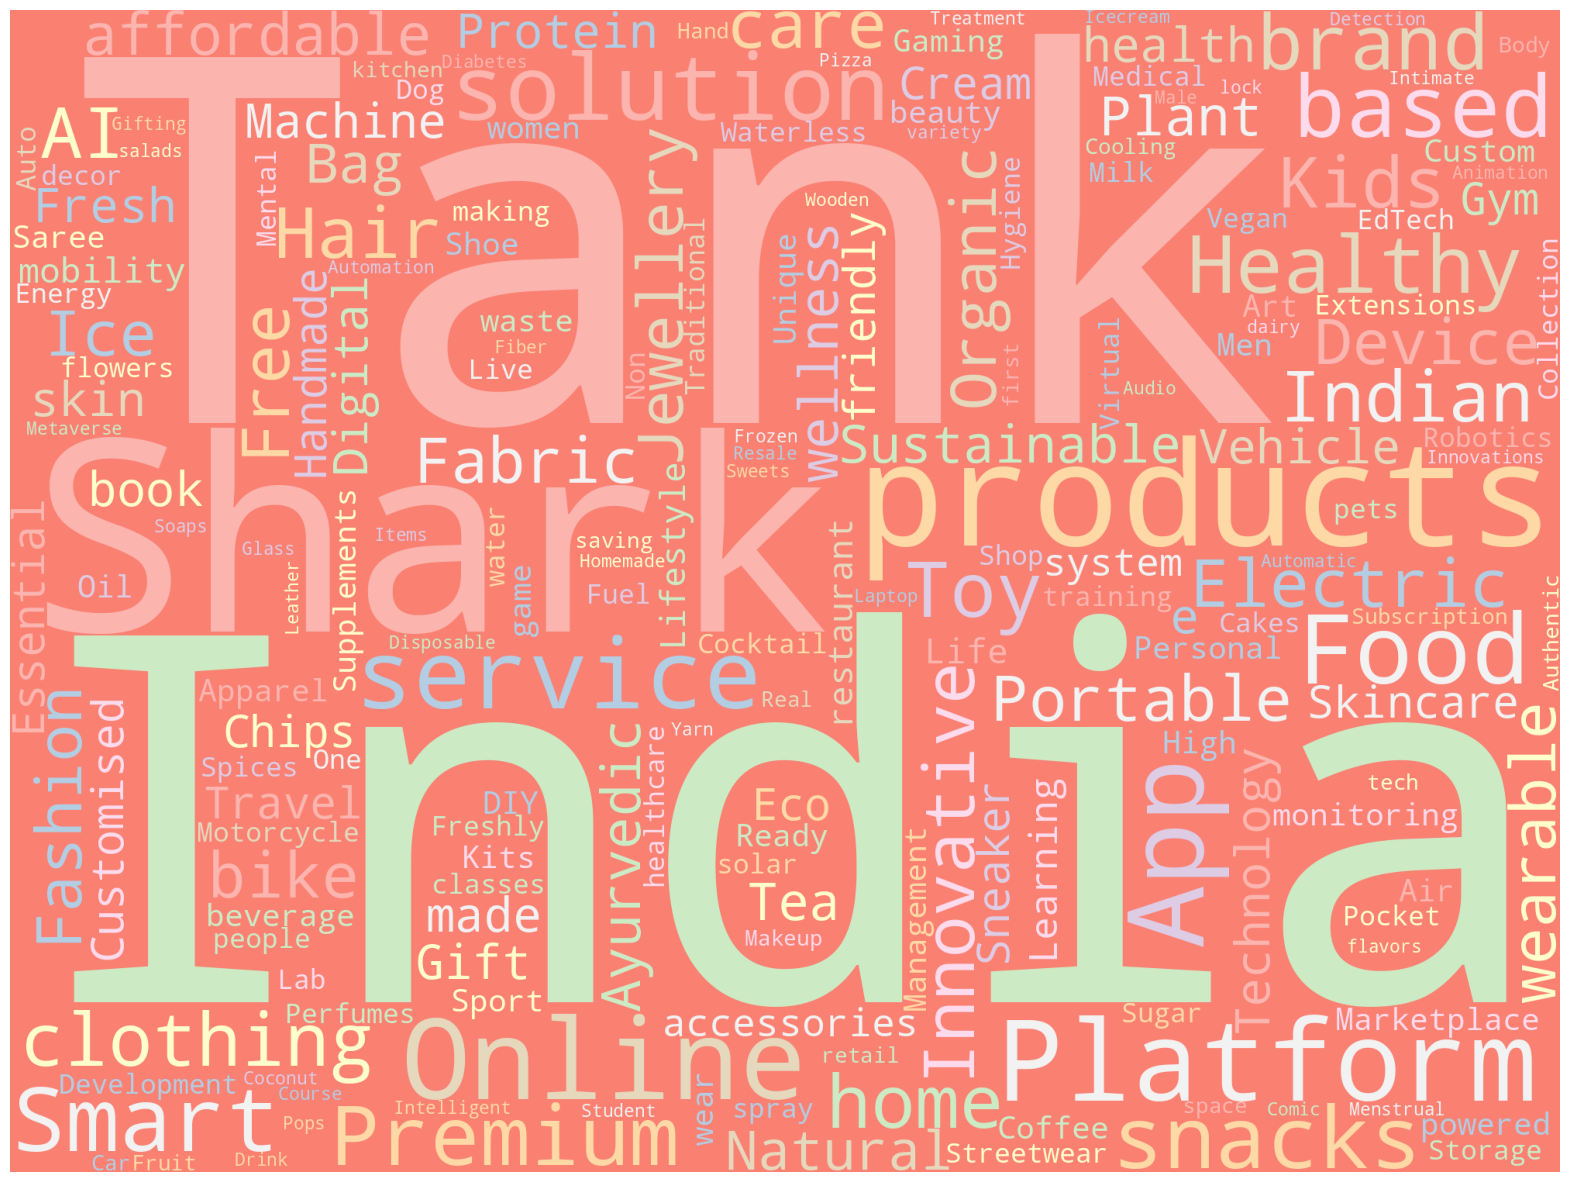

In [108]:
# Word cloud based on Business Description of startups came in all seasons
text = " Shark Tank India ".join(cat for cat in shark_tank.loc[shark_tank['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

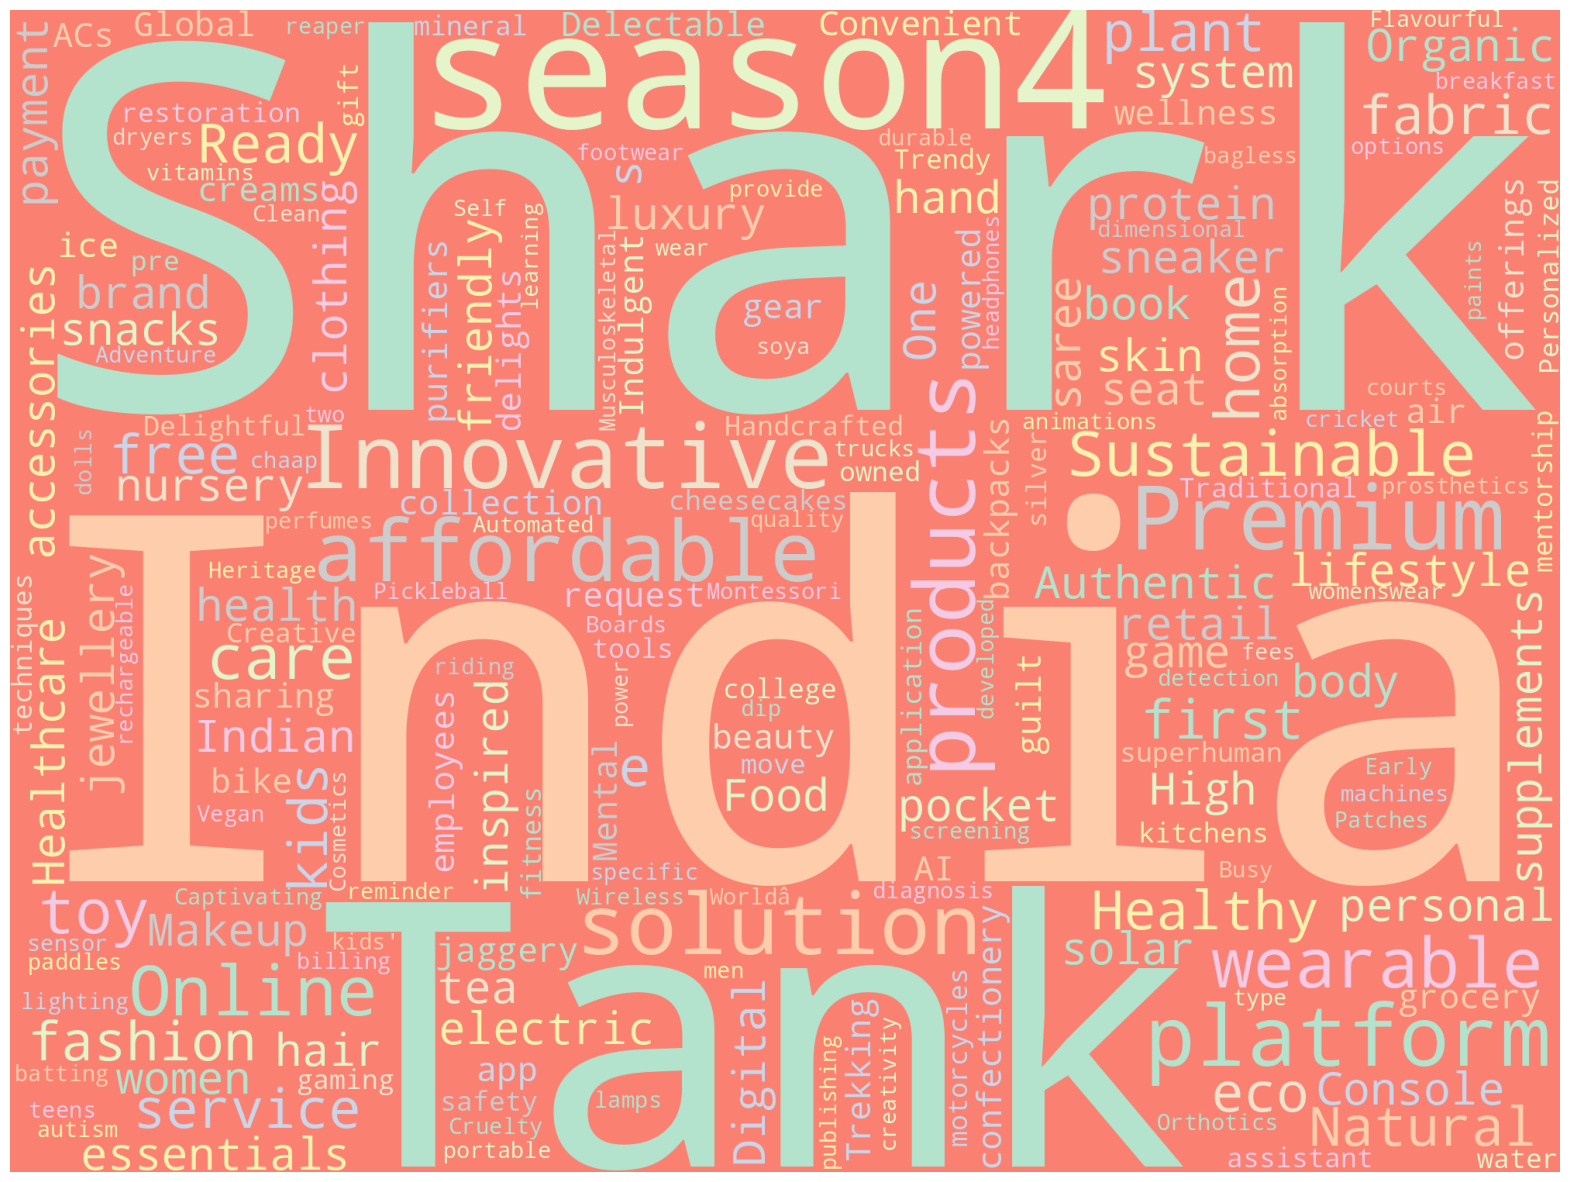

In [109]:
# Word cloud based on Business Description, startups came in current/latest season (4th season)
text = " Shark Tank India season4 ".join(cat for cat in shark_tank_season4.loc[shark_tank_season4['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(20,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## ⭐ Hindi Bigg Boss Season18
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-hindi-season-18-winner

## Kannada Bigg Boss Season11
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-kannada-season-11-winner

## Telugu Bigg Boss Season8
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-telugu-season-8-winner

## Tamil Bigg Boss Season8
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-tamil-season-8-winner

## Malayalam Bigg Boss Season6
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-malayalam-season-6-winner

## Marathi Bigg Boss Season5
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-marathi-season-5-winner

## Bangla Bigg Boss Season3
## https://www.kaggle.com/code/thirumani/predicting-bigg-boss-bangla-season-3-winner

In [110]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [111]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.3
# matplotlib version: 3.7.5
# seaborn version: 0.12.2
# plotly version: 5.24.1

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.5
seaborn version: 0.12.2
plotly version: 5.24.1


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [112]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenters'].fillna(0) + shark_tank['Female Presenters'] + shark_tank['Transgender Presenters'].fillna(0)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [113]:
shark_tank.loc[(shark_tank['Male Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [114]:
shark_tank.loc[(shark_tank['Female Presenters'].isnull()) & (shark_tank['Couple Presenters'] == 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [115]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [116]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [117]:
shark_tank.loc[(shark_tank['Accepted Offer'].isnull()) & (shark_tank['Number of Sharks in Deal'] >= 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [118]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Ritesh Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Amit Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Season Number           Startup Name  Episode Number  Pitch Number  \
561              4                Chokhat              29           562   
579              4  Nidhi'sGrandmaaSecret              35           580   

    Season Start Season End Original Air Date                  Episode Title  \
561     6-Jan-25        NaN         13-Feb-25          Home, Coffee And Play   
579     6-Jan-25        NaN         21-Feb-25  Green Business And Big Dreams   

              Anchor        Industry            Business Description  \
561  Aashish Solanki  Lifestyle/Home  Affordable designer home decor   
579  Aashish Solanki  Beauty/Fashion      Natural hair oil Ayurvedic   

                 Company Website  Started in  Number of Presenters  \
561      https://www.chokhat.in/        2018                     1   
579  https://grandmaasecret.com/        2023                     3   

     Male Presenters  Female Presenters  Transgender Presenters  \
561                0                  1                    <NA>   
579                1                  2                    <NA>   

     Couple Presenters Pitchers Average Age Pitchers City Pitchers State  \
561                  0               Middle         Delhi          Delhi   
579                  1               Middle      Gurugram        Haryana   

     Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  ...  \
561              55            NaN           NaN           8  ...   
579             400            NaN           NaN        <NA>  ...   

     Aman Investment Amount Aman Investment Equity  Aman Debt Amount  \
561                     NaN                    NaN               NaN   
579                     NaN                    NaN               NaN   

    Peyush Investment Amount Peyush Investment Equity Peyush Debt Amount  \
561                      5.0                     10.0                5.0   
579                      NaN                      NaN                NaN   

     Ritesh Investment Amount  Ritesh Investment Equity  Ritesh Debt Amount  \
561                       NaN                       NaN                 NaN   
579                       NaN                       NaN                 NaN   

     Amit Investment Amount  Amit Investment Equity  Amit Debt Amount  \
561                     NaN                     NaN               NaN   
579                     NaN                     NaN               NaN   

     Guest Investment Amount  Guest Investment Equity  Guest Debt Amount  \
561                      NaN                      NaN                NaN   
579                      NaN                      NaN                NaN   

     Invested Guest Name  All Guest Names Namita Present  Vineeta Present  \
561                  NaN       Kunal Bahl            NaN              1.0   
579                  NaN       Kunal Bahl            NaN              1.0   

     Anupam Present  Aman Present  Peyush Present  Ritesh Present  \
561             1.0           1.0             1.0             NaN   
579             1.0           1.0             1.0             NaN   

     Amit Present  Guest Present  
561           NaN            1.0  
579           NaN            1.0  

[2 rows x 80 columns]

In [119]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Ritesh Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Amit Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0),1)]

Season Number           Startup Name  Episode Number  Pitch Number  \
561              4                Chokhat              29           562   
579              4  Nidhi'sGrandmaaSecret              35           580   

    Season Start Season End Original Air Date                  Episode Title  \
561     6-Jan-25        NaN         13-Feb-25          Home, Coffee And Play   
579     6-Jan-25        NaN         21-Feb-25  Green Business And Big Dreams   

              Anchor        Industry            Business Description  \
561  Aashish Solanki  Lifestyle/Home  Affordable designer home decor   
579  Aashish Solanki  Beauty/Fashion      Natural hair oil Ayurvedic   

                 Company Website  Started in  Number of Presenters  \
561      https://www.chokhat.in/        2018                     1   
579  https://grandmaasecret.com/        2023                     3   

     Male Presenters  Female Presenters  Transgender Presenters  \
561                0                  1                    <NA>   
579                1                  2                    <NA>   

     Couple Presenters Pitchers Average Age Pitchers City Pitchers State  \
561                  0               Middle         Delhi          Delhi   
579                  1               Middle      Gurugram        Haryana   

     Yearly Revenue  Monthly Sales  Gross Margin  Net Margin  ...  \
561              55            NaN           NaN           8  ...   
579             400            NaN           NaN        <NA>  ...   

     Aman Investment Amount Aman Investment Equity  Aman Debt Amount  \
561                     NaN                    NaN               NaN   
579                     NaN                    NaN               NaN   

    Peyush Investment Amount Peyush Investment Equity Peyush Debt Amount  \
561                      5.0                     10.0                5.0   
579                      NaN                      NaN                NaN   

     Ritesh Investment Amount  Ritesh Investment Equity  Ritesh Debt Amount  \
561                       NaN                       NaN                 NaN   
579                       NaN                       NaN                 NaN   

     Amit Investment Amount  Amit Investment Equity  Amit Debt Amount  \
561                     NaN                     NaN               NaN   
579                     NaN                     NaN               NaN   

     Guest Investment Amount  Guest Investment Equity  Guest Debt Amount  \
561                      NaN                      NaN                NaN   
579                      NaN                      NaN                NaN   

     Invested Guest Name  All Guest Names Namita Present  Vineeta Present  \
561                  NaN       Kunal Bahl            NaN              1.0   
579                  NaN       Kunal Bahl            NaN              1.0   

     Anupam Present  Aman Present  Peyush Present  Ritesh Present  \
561             1.0           1.0             1.0             NaN   
579             1.0           1.0             1.0             NaN   

     Amit Present  Guest Present  
561           NaN            1.0  
579           NaN            1.0  

[2 rows x 80 columns]

In [120]:
shark_tank.loc[round(shark_tank['Total Deal Debt'].fillna(0),1) != round(shark_tank['Ritesh Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Amit Debt Amount'].fillna(0) + shark_tank['Guest Debt Amount'].fillna(0),1)]

Season Number Startup Name  Episode Number  Pitch Number Season Start  \
561              4      Chokhat              29           562     6-Jan-25   

    Season End Original Air Date          Episode Title           Anchor  \
561        NaN         13-Feb-25  Home, Coffee And Play  Aashish Solanki   

           Industry            Business Description          Company Website  \
561  Lifestyle/Home  Affordable designer home decor  https://www.chokhat.in/   

     Started in  Number of Presenters  Male Presenters  Female Presenters  \
561        2018                     1                0                  1   

     Transgender Presenters  Couple Presenters Pitchers Average Age  \
561                    <NA>                  0               Middle   

    Pitchers City Pitchers State  Yearly Revenue  Monthly Sales  Gross Margin  \
561         Delhi          Delhi              55            NaN           NaN   

     Net Margin  ...  Aman Investment Amount Aman Investment Equity  \
561           8  ...                     NaN                    NaN   

     Aman Debt Amount Peyush Investment Amount Peyush Investment Equity  \
561               NaN                      5.0                     10.0   

    Peyush Debt Amount  Ritesh Investment Amount  Ritesh Investment Equity  \
561                5.0                       NaN                       NaN   

     Ritesh Debt Amount  Amit Investment Amount  Amit Investment Equity  \
561                 NaN                     NaN                     NaN   

     Amit Debt Amount  Guest Investment Amount  Guest Investment Equity  \
561               NaN                      NaN                      NaN   

     Guest Debt Amount  Invested Guest Name  All Guest Names Namita Present  \
561                NaN                  NaN       Kunal Bahl            NaN   

     Vineeta Present  Anupam Present  Aman Present  Peyush Present  \
561              1.0             1.0           1.0             1.0   

     Ritesh Present  Amit Present  Guest Present  
561             NaN           NaN            1.0  

[1 rows x 80 columns]

In [121]:
shark_tank.loc[(shark_tank['Received Offer'] == 1) & (shark_tank['Accepted Offer'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [122]:
shark_tank.loc[(shark_tank['Received Offer'] == 0) & (shark_tank['Accepted Offer'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [123]:
shark_tank.loc[(shark_tank['Number of Sharks in Deal'].fillna(0).round(0).astype(int) != shark_tank['Ritesh Investment Amount'].notnull().astype("int") + shark_tank['Namita Investment Amount'].notnull().astype("int") + shark_tank['Anupam Investment Amount'].notnull().astype("int") + shark_tank['Vineeta Investment Amount'].notnull().astype("int") + shark_tank['Aman Investment Amount'].notnull().astype("int") + shark_tank['Peyush Investment Amount'].notnull().astype("int") + shark_tank['Amit Investment Amount'].notnull().astype("int") + shark_tank['Guest Investment Amount'].notnull().astype("int")) & (shark_tank['Guest Present']<2) ]

Season Number           Startup Name  Episode Number  Pitch Number  \
566              4             Vibrasense              30           567   
579              4  Nidhi'sGrandmaaSecret              35           580   

    Season Start Season End Original Air Date  \
566     6-Jan-25        NaN         14-Feb-25   
579     6-Jan-25        NaN         21-Feb-25   

                        Episode Title                       Anchor  \
566  Health, Lifestyle And Innovation  Sahiba Bali/Aashish Solanki   
579     Green Business And Big Dreams              Aashish Solanki   

           Industry        Business Description              Company Website  \
566  Medical/Health     Life-saving innovations   https://www.vibrasense.in/   
579  Beauty/Fashion  Natural hair oil Ayurvedic  https://grandmaasecret.com/   

     Started in  Number of Presenters  Male Presenters  Female Presenters  \
566        <NA>                     1                1                  0   
579        2023                     3                1                  2   

     Transgender Presenters  Couple Presenters Pitchers Average Age  \
566                    <NA>                  0               Middle   
579                    <NA>                  1               Middle   

    Pitchers City Pitchers State  Yearly Revenue  Monthly Sales  Gross Margin  \
566       Sonipat        Haryana            <NA>            NaN           NaN   
579      Gurugram        Haryana             400            NaN           NaN   

     Net Margin  ...  Aman Investment Amount Aman Investment Equity  \
566        <NA>  ...                     NaN                    NaN   
579        <NA>  ...                     NaN                    NaN   

     Aman Debt Amount Peyush Investment Amount Peyush Investment Equity  \
566               NaN                     50.0                     2.38   
579               NaN                      NaN                      NaN   

    Peyush Debt Amount  Ritesh Investment Amount  Ritesh Investment Equity  \
566                NaN                       NaN                       NaN   
579                NaN                       NaN                       NaN   

     Ritesh Debt Amount  Amit Investment Amount  Amit Investment Equity  \
566                 NaN                     NaN                     NaN   
579                 NaN                     NaN                     NaN   

     Amit Debt Amount  Guest Investment Amount  Guest Investment Equity  \
566               NaN                      NaN                      NaN   
579               NaN                      NaN                      NaN   

     Guest Debt Amount  Invested Guest Name  All Guest Names Namita Present  \
566                NaN                  NaN       Kunal Bahl            1.0   
579                NaN                  NaN       Kunal Bahl            NaN   

     Vineeta Present  Anupam Present  Aman Present  Peyush Present  \
566              1.0             1.0           NaN             1.0   
579              1.0             1.0           1.0             1.0   

     Ritesh Present  Amit Present  Guest Present  
566             NaN           NaN            1.0  
579             NaN           NaN            1.0  

[2 rows x 80 columns]

In [124]:
shark_tank.loc[(shark_tank['Couple Presenters'] != 0) & (shark_tank['Couple Presenters'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [125]:
shark_tank.loc[(shark_tank['Received Offer'] != 0) & (shark_tank['Received Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [126]:
shark_tank.loc[(shark_tank['Accepted Offer'] != 0) & (shark_tank['Accepted Offer'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [127]:
shark_tank.loc[(shark_tank['Ritesh Investment Amount'].notnull()) & (shark_tank['Ritesh Present'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [128]:
shark_tank.loc[(shark_tank['Namita Investment Amount'].notnull()) & (shark_tank['Namita Present'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [129]:
shark_tank.loc[(shark_tank['Anupam Investment Amount'].notnull()) & (shark_tank['Anupam Present'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [130]:
shark_tank.loc[(shark_tank['Vineeta Investment Amount'].notnull()) & (shark_tank['Vineeta Present'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [131]:
shark_tank.loc[(shark_tank['Aman Investment Amount'].notnull()) & (shark_tank['Aman Present'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [132]:
shark_tank.loc[(shark_tank['Peyush Investment Amount'].notnull()) & (shark_tank['Peyush Present'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [133]:
shark_tank.loc[(shark_tank['Amit Investment Amount'].notnull()) & (shark_tank['Amit Present'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [134]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Present'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [135]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Invested Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [136]:
shark_tank.loc[(shark_tank['All Guest Names'].isnull()) & (shark_tank['Guest Present'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [137]:
shark_tank.loc[(shark_tank['Total Deal Debt'].isnull()) & (shark_tank['Debt Interest'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [138]:
shark_tank.loc[(shark_tank['Received Offer'] == 0) & (shark_tank['Deal Has Conditions'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [139]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Royalty Percentage'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [140]:
shark_tank.loc[(shark_tank['Royalty Percentage'].notnull()) & (shark_tank['Royalty Recouped Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [141]:
shark_tank.loc[(shark_tank['Royalty Percentage'].isnull()) & (shark_tank['Royalty Recouped Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

In [142]:
shark_tank.loc[(shark_tank['Accepted Offer'] == 0) & (shark_tank['Advisory Shares Equity'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Episode Title, Anchor, Industry, Business Description, Company Website, Started in, Number of Presenters, Male Presenters, Female Presenters, Transgender Presenters, Couple Presenters, Pitchers Average Age, Pitchers City, Pitchers State, Yearly Revenue, Monthly Sales, Gross Margin, Net Margin, EBITDA, Cash Burn, SKUs, Has Patents, Bootstrapped, Part of Match off, Original Ask Amount, Original Offered Equity, Valuation Requested, Received Offer, Accepted Offer, Total Deal Amount, Total Deal Equity, Total Deal Debt, Debt Interest, Deal Valuation, Number of Sharks in Deal, Deal Has Conditions, Royalty Percentage, Royalty Recouped Amount, Advisory Shares Equity, Namita Investment Amount, Namita Investment Equity, Namita Debt Amount, Vineeta Investment Amount, Vineeta Investment Equity, Vineeta Debt Amount, Anupam Investment Amount, Anupam Investment Equity, Anupam Debt Amount, Aman Investment Amount, Aman Investment Equity, Aman Debt Amount, Peyush Investment Amount, Peyush Investment Equity, Peyush Debt Amount, Ritesh Investment Amount, Ritesh Investment Equity, Ritesh Debt Amount, Amit Investment Amount, Amit Investment Equity, Amit Debt Amount, Guest Investment Amount, Guest Investment Equity, Guest Debt Amount, Invested Guest Name, All Guest Names, Namita Present, Vineeta Present, Anupam Present, Aman Present, Peyush Present, Ritesh Present, Amit Present, Guest Present]
Index: []

[0 rows x 80 columns]

## Related Articles

### https://www.livemint.com/companies/start-ups/shark-tank-and-india-s-startup-story-in-charts-11681325377779.html

### https://medium.com/@satya.thirumani/shark-tank-india-data-analysis-8635cb2a7153